# Naive B cell project 
Summary Workflow

**Or Shemesh : 204065767**

# Introduction

In this project we working with Naive B cells data set. We will try to create a model that will predict the subject's health status based on the features of his repertoire sequences.

** Data Pre-Proccecing**

The data was obtained from a plate of naive B cells derived from blood samples of 98 patients, 51 of whom were diagnosed with celiac disease. (It is known that there are specific biomarkers that allow us to specifically sequence naive B cells with error rates ranging from 10-20%). We get FASTA files, which we tranfer in IGBLAST and MAKE_DB algorithms to align the sequences to the known human reference. At the end of the MAKE DB process, we have a table that the raws represent patient's repertoire sequences, and the different columns describe different characteristics of the sequence.

**Project goal**

In this work we will investigate a range of state-of-the-art machine learning methods for classification,
including **random forests, logistic regression and support vector regression**. These models will be applied to predict the clinically-relevant subject states based on observed repertoire features. **Cross-validation** will be used to prevent over-fitting, and **feature selection** will allow for identification of the most relevant properties.


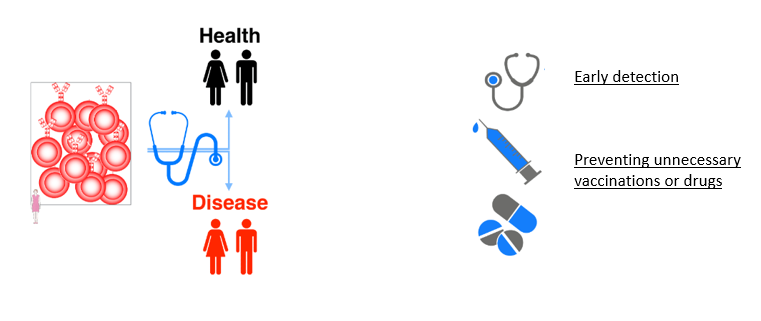

In [47]:
from IPython.display import Image
Image(filename='the_project_goal.png')

We hope that the tools we develop will pave the way for Ig repertoire data to be used for diagnostic and prognostic purposes, and allow for tailored treatment for each individual based on their immune system characteristics. A satisfying classification model will approve a future low cost test for early detection of celiac patients, save unnecessary medical procedures and might reveal unique signatures for potential antibodies development.


**Input:**  patient’s BCR  repertoire

**Output:** A clinical status for the patient given by the probability of being a Celiac patient. 

# The problem

It is very difficult to do the prediction by this dataset type (Naive B cell).
Because a Naive B cells is a B cell that has not been exposed to an antigen. In other words, they do not carry information about patient's immune history.
Moreover, there are no former works on naive BCR analysis for early detection of celiac. <br/>
The diversity and structure of disease antigen-specific sequence motufs in immune repertoires remains enigmatic.<br/>
**Machine learning** is an ideal approach for predicting disease antibody-specific motifs as it captures long-range (3D-structural) motifs using only the linear B cell receptor sequence.

# Contents

Step 1: Data Overview <br/>
1.2: Feature Engineering <br/>
1.3: Summary of New features <br/>
Step 2: Basic Questions <br/>
2.1: EDA: exploratory data analysis <br/>
2.1.1: Standardization <br/>
2.1.2: First visualization <br/>
2.2: Kolmogorov Smirnov test <br/>
2.2.1: Extract features based on KS test <br/>
2.2.2: Visualization <br/>
Step 3: Feature Selection - 2 methods <br/>
3.1: Feature Selection- Our New Method - based on KS test <br/>
3.1.1: Visualize the impact of feature selected used PCA (Principal component Analysis) <br/>
3.2:  Extract important features used Random Forest <br/>
3.2.1:  Visualize the impact of feature selected used PCA (Principal component Analysis) <br/>
3.3: Comparison between the chosen best informative features  by KS vs Random-Forest <br/>
3.4: Visualize the impact of 'informative_features' on health status <br/>
3.4.1: Continued analyzed based on Visualization <br/>
Step 4: Learning Algorithms <br/>
4.1: Load packages <br/>
4.2: Random Forest <br/>
4.2.1: Tuned Hyperparameter - Random Forest <br/>
4.2.2: Prediction and Evaluations - Random Forest <br/>
4.3: SVC <br/>
4.3.1: Tuned Hyperparameter - SVC <br/>
4.3.2: Prediction and evaluations - SVC <br/>
4.4: Logistic Regression <br/>
4.4.1: Tuned hyperparameters - LR <br/>
4.4.2: Prediction and evaluation - LR <br/>
4.5: Gaussian Naive Bayes <br/>
4.5.1: Evaluate classifier for all the features <br/>
4.5.2: Evaluate GaussianNB model for the informative features <br/>
4.6: Compare Machine Learning Algorithms and improve by cross validation <br/>
4.7: Learning curve of GaussianNB and SVM <br/>
4.7.1: LC -  For all the features  <br/>
4.7.2: LC - For selected features <br/>
Step 5:  Control <br/>
5.1: Control -  Without selecting features <br/>
5.2 Control - For informative columns <br/>
5.3 Control - compare algorithms scores <br/>
5.4 Control Results <br/>
Step 6: New machine learning function  <br/> 
6.1: with SVM model <br/>
6.2:  With Gaussian Naive Bayes model <br/>
6.3: New ML - Control <br/>
6.6: Final Prediction Results <br/>
Step 7: Conclusion and Results <br/>
The next steps <br/>


# Required packages:

Before starting, install and load the following packages. 

In [3]:
#%% Import python modules:
import numpy as np
from sklearn.neighbors import BallTree
from sklearn.metrics import f1_score
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import preprocessing
import urllib.request as ur
from gzip import GzipFile
import pandas as pd
%matplotlib inline


# Step1: Data Overview

First, before making pre-processing, we look at the raw dataframe. We create violin graphs in order to observe an interesting feature. The interesting feature will be one that gives us a big difference between cohorts. 

In [13]:
# READ FILE
import csv
dfALLs2 = pd.read_table("dfALL_after_order_genes.csv",error_bad_lines=False,sep="\t")


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (41) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [734]:
dfALLs2.head()

,CDR3_AA_ACIDIC,CDR3_AA_ALIPHATIC,CDR3_AA_AROMATIC,CDR3_AA_BASIC,CDR3_AA_BULK,CDR3_AA_CHARGE,CDR3_AA_GRAVY,CDR3_AA_LENGTH,CDR3_AA_POLARITY,CLIN,...,V_SEQ_LENGTH,V_SEQ_START,V_GENE,V_ALLELE,V_FAMILY,D_GENE,D_ALLELE,D_FAMILY,J_GENE,J_FAMILY
0,0.105263,0.410526,0.315789,0.052632,15.510000,-1.003173,-0.368421,19.0,8.021053,Healthy,...,292,1,IGHV4-34,IGHV4-34*01,IGHV4,IGHD1-26,IGHD1-26*01,IGHD1,IGHJ5,IGHJ5*02
1,0.071429,0.771429,0.142857,0.071429,13.752143,-0.001683,0.414286,14.0,8.128571,Healthy,...,293,1,IGHV3-21,IGHV3-21*01,IGHV3,IGHD6-19,IGHD6-19*01,IGHD6,IGHJ4,IGHJ4*02
2,0.100000,0.390000,0.300000,0.050000,14.960000,-1.007156,-0.440000,20.0,8.000000,Healthy,...,293,1,IGHV1-69,IGHV1-69*01,IGHV1,IGHD3-3,IGHD3-3*01,IGHD3,IGHJ6,IGHJ6*03
3,0.117647,0.058824,0.470588,0.058824,15.103529,-1.007731,-0.900000,17.0,7.917647,Healthy,...,295,1,IGHV3-23,IGHV3-23*01,IGHV3,IGHD3-3,IGHD3-3*01,IGHD3,IGHJ5,IGHJ5*02
4,0.111111,0.594444,0.277778,0.055556,15.718889,-1.009332,0.011111,18.0,7.722222,Healthy,...,295,1,IGHV1-69,IGHV1-69*01,IGHV1,IGHD5-18,IGHD5-18*01,IGHD5,IGHJ6,IGHJ6*03


In [22]:
# drop unrelevant columns
dfALLs2.drop(list(dfALLs2.filter(regex = 'Unnamed')), axis = 1, inplace = True)
raw_data = dfALLs2.iloc[:,9:-8]
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3003858 entries, 0 to 3003857
Data columns (total 38 columns):
CLIN                  object
CONSCOUNT             int64
D_CALL                object
D_GERM_LENGTH         float64
D_GERM_START          float64
D_SEQ_LENGTH          float64
D_SEQ_START           float64
FUNCTIONAL            bool
INDELS                bool
IN_FRAME              bool
JUNCTION              object
JUNCTION_LENGTH       int64
J_CALL                object
J_GERM_LENGTH         int64
J_GERM_START          int64
J_SEQ_LENGTH          int64
J_SEQ_START           int64
MUTATED_INVARIANT     float64
NP1_LENGTH            int64
NP2_LENGTH            float64
PRCONS                object
PRIMER                object
SAMPLE                object
SEQORIENT             object
SEQUENCE_ID           object
SEQUENCE_IMGT         object
SEQUENCE_INPUT        object
SEQUENCE_VDJ          object
SEX                   object
STOP                  bool
SUBJECT               floa

## 1.2 Feature Engineering

#### The dataframe columns: 
Due to biological reasons, we don't need all the columns for our prediction model, but maybe the combination of some columns give us a more informative feature.
***In the presentation format, there has a description of all the features we finally used for the learning machines. (See Celiac.ppt)***

**Assigning datatypes:**

We need to make sure our column types and levels of measurement before doing analysis.<br/>
For this purpose, we convert information represented by a string to numbers.  We did this by displaying the expression frequency of each string feature.<br/>
For example, V3 gene is expressed in 30% of a person's sequence repertoire. <br/>

In order to create a dataframe with target column (represent each subject's repertoire, 98 rows) and features columns we reconstruct this dataframe:
We don't use all the columns for analyzing. But create a new table with significant biology features that include only float type values by looking on the column's frequency per subject_name.<br/>
Finally, we have data which all the features columns are in float type.

**Deal with Nan variables**

We have 2 steps of dealing with Nan variables:
* 1) In the first raw data we got, have some Nan variable when antibody's sequence is not recognize properly. In this case, for each subject, we delete sequence rows(from his repertoire) with Nan value in our interested columns (features).

* 2) After we create all the new features' tables, we merge them together in order to get one big dataframe with all the new features of each subject. At this stage, we got a Nan value blocks in specific column, for subjects that no expression this feature. Since each column represents the frequency of feature's appear in the repertoire, we inserted zeros instead of Nan values.

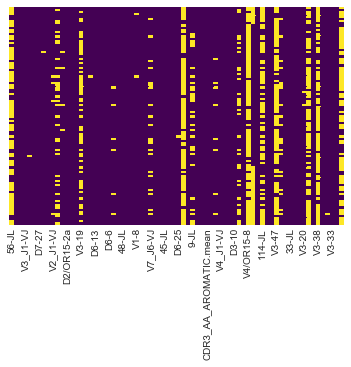

In [603]:
from IPython.display import Image
Image(filename='null_values_in_merge_table.png')

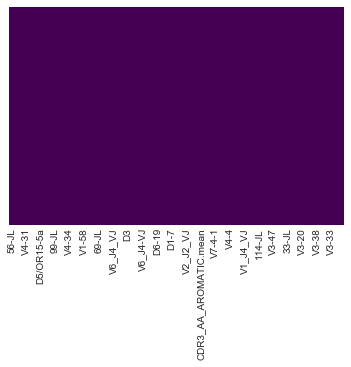

In [602]:
from IPython.display import Image
Image(filename='null_after_insert_zeros.png')

Check if we have null values

In [626]:
df.iloc[:,3:].isnull().values.any()

False

**The final dataset**

Repertoire properties, including gene usage and H-CDR3 physicochemical properties, were calculated using **Alakazam**.


In [6]:
# you can find the creation of this table on 'combine_features_tables' notebook
df_per_target = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
print(df_per_target.shape)
df = df_per_target 
df.head()

(98, 1046)


,SUBJECTN,CLIN,SEX,V1,V2,V3,V4,V5,V6,V7,...,33.0-DseqL,34.0-DseqL,35.0-DseqL,36.0-DseqL,37.0-DseqL,5.0-DseqL,6.0-DseqL,7.0-DseqL,8.0-DseqL,9.0-DseqL
0,BC_10,Healthy,NaN,0.232505,0.025345,0.431113,0.243586,0.058649,0.008521,0.000281,...,0.000076,0.000127,0.000025,0.000025,0.000000,0.049911,0.067015,0.057405,0.051976,0.051160
1,BC_11,Healthy,NaN,0.213667,0.026993,0.466993,0.238861,0.044784,0.008565,0.000137,...,0.000096,0.000019,0.000058,0.000039,0.000000,0.048053,0.061529,0.054425,0.050902,0.050729
2,BC_12,Healthy,NaN,0.208928,0.025766,0.401013,0.307753,0.032451,0.010218,0.013870,...,0.000000,0.000224,0.000000,0.000000,0.000000,0.050220,0.065361,0.056734,0.051886,0.050319
3,BC_13,Healthy,NaN,0.208727,0.048319,0.402105,0.284245,0.049473,0.006873,0.000258,...,0.000247,0.000073,0.000058,0.000029,0.000015,0.049292,0.058772,0.051546,0.047576,0.047881
4,BC_14,Healthy,NaN,0.248387,0.022468,0.449467,0.224517,0.047101,0.007833,0.000227,...,0.000302,0.000267,0.000107,0.000036,0.000089,0.045476,0.053533,0.045690,0.045299,0.047415


Now, The dataset contains expression levels of 98 subject (rows) over 1043 features (columns)

### 1.3 Summary of New features:
D: Gene & Family usage <br/>
V : Gene & Family usage <br/>
J : Gene usage <br/>
V-J : all possible combination between V and J genes <br/>
JUNCTION LENGTH: column for each type of length <br/>
V-J-JL: all possible combination between V,J and Junction length <br/>
DseqL: D sequence length <br/>
FUNC: functionality <br/>
CDR3 properties: <br/>
CDR3_AA_LENGTH: number of amino acids. <br/>
CDR3_AA_GRAVY : grand average of hydrophobicity(GRAVY) index. <br/>
CDR3_AA_BULK : average bulkiness of amino acids. <br/>
CDR3_AA_ALIPHATIC: aliphatic index. <br/>
CDR3_AA_CHARGE: net charge. <br/>
CDR3_AA_BASIC: fraction of informative position that are Arg,His or Lys. <br/>
CDR3_AA_ACIDIC: fraction of informative position that are Asp or Glu. <br/>
CDR3_AA_AROMATIC: fraction of informative positions that are His,Phe,Trp or Tyr. <br/>
<br/>
**For more information about each feature - See the "Celiac.ppt" file**

-------------------------------------------------------------------------------------

# Step 2: Basic Questions

How much subjects we have from each cohort?

Number of Healthy :  47
Number of Celiac :  51


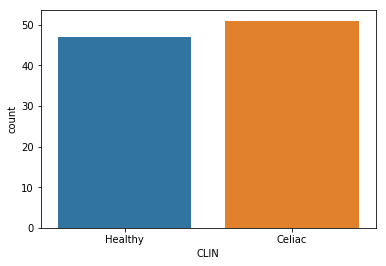

In [226]:
df_per_target = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
ax = sns.countplot(df_per_target.loc[:,'CLIN'],label="Count")       # H = 15, C = 49
C, H = df_per_targ`aet.loc[:,'CLIN'].value_counts()
print('Number of Healthy : ',H)
print('Number of Celiac : ',C)

Number of Healthy :  1477747
Number of Celiac :  1526111


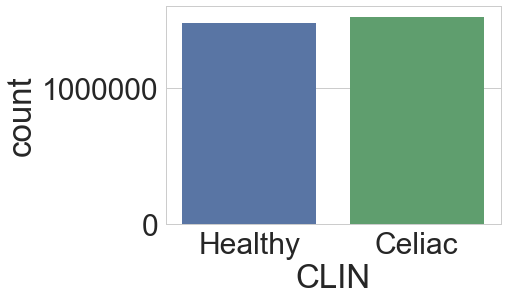

In [741]:
# How many sequences we have from each cohort?
ax = sns.countplot(dfALLs2.loc[:,'CLIN'],label="Count")     
C, H = dfALLs2.loc[:,'CLIN'].value_counts()
print('Number of Healthy : ',H)
print('Number of Celiac : ',C)
H_rows_sequences = H
C_rows_sequences = C

How many gender types are declared and how many we have from each cohort ?

In [243]:
df_per_target['SEX'].value_counts()

F    46
M    18
Name: SEX, dtype: int64

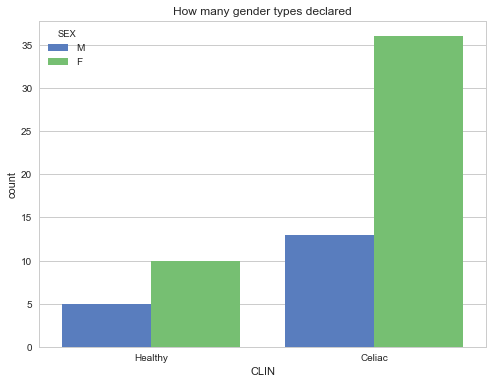

Note: There are samples without gender declaration 
34 SEX=Nan values


In [604]:
fig, ax=plt.subplots(figsize=(8,6))
sns.countplot(x='CLIN', data=df_per_target, hue='SEX')
plt.title("How many gender types declared")
plt.show()
print('Note: There are samples without gender declaration ')
print(df_per_target.loc[:,'SEX'].isna().sum(),'SEX=Nan values')

Check the kde plot of 'cdr3_AA_length' column in the raw data

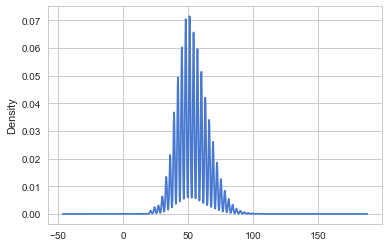

In [245]:
raw_data['JUNCTION_LENGTH'].plot.kde()

Impact of  non-functional(FUNC_F) sequences on Health status

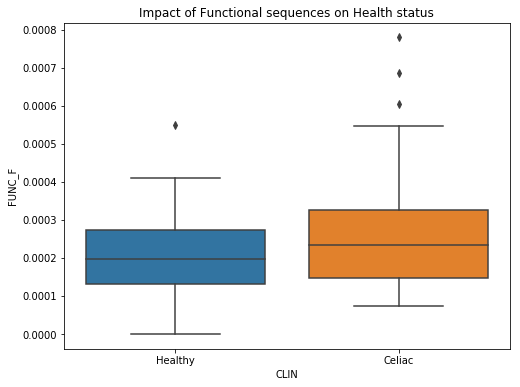

In [7]:
fig, ax=plt.subplots(figsize=(8,6))
sns.boxplot(x='CLIN', y='FUNC_F', data=df[df.loc[:,'FUNC_F']<0.0010])
plt.title("Impact of  non Functional sequences on Health status")
plt.show()

Impact of IGM isotype in subject's repertoire on Health status

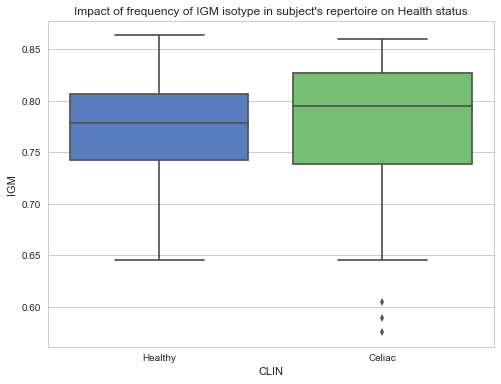

In [558]:
fig, ax=plt.subplots(figsize=(8,6))
sns.boxplot(x='CLIN', y='IGM', data= df)
plt.title("Impact of IGM isotype in subject's repertoire on Health status")
plt.show()

Let's check which features contain missing values

In [560]:
print(df.isnull().sum())


SUBJECTN       0
CLIN           0
SEX           34
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
D1             0
D2             0
D3             0
D4             0
D5             0
D6             0
D7             0
J1             0
J2             0
J3             0
J4             0
J5             0
J6             0
V1-18          0
V1-2           0
V1-24          0
V1-3           0
V1-38-4        0
V1-45          0
V1-46          0
              ..
13.0-DseqL     0
14.0-DseqL     0
15.0-DseqL     0
16.0-DseqL     0
17.0-DseqL     0
18.0-DseqL     0
19.0-DseqL     0
20.0-DseqL     0
21.0-DseqL     0
22.0-DseqL     0
23.0-DseqL     0
24.0-DseqL     0
25.0-DseqL     0
26.0-DseqL     0
27.0-DseqL     0
28.0-DseqL     0
29.0-DseqL     0
30.0-DseqL     0
31.0-DseqL     0
32.0-DseqL     0
33.0-DseqL     0
34.0-DseqL     0
35.0-DseqL     0
36.0-DseqL     0
37.0-DseqL     0
5.0-DseqL      0
6.0-DseqL      0
7.0-DseqL     

## 2.1 EDA : Exploratory Data Analysis

### 2.1.1 Standartization of Data

All the data values of our dataframe are numeric. Now, we need to convert them on a single scale. We can standardize the values.  We can use the below formula for standardization.

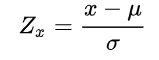

In [607]:
Image(filename='z_score.png')

### 2.1.2 First Visualization

First, we interest of visualize the distribution of CDR3 region properties because it have a significant relevant feature according related papers

Number of Celiac:  51
Number of Healthy :  47
Difference: 4
percentage:  0.0784313725490196


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

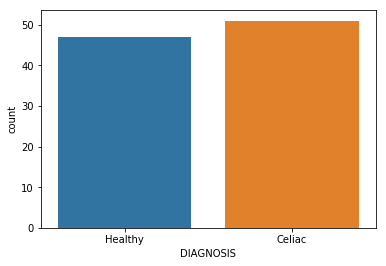

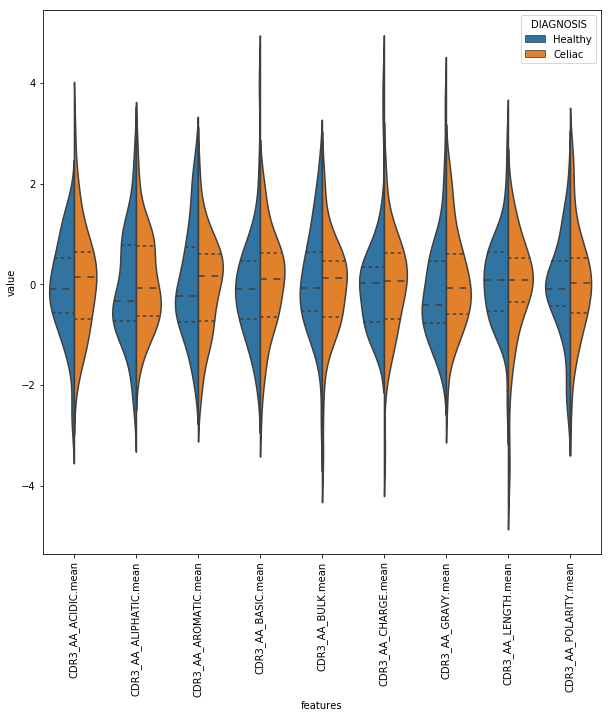

In [177]:
df_gene = df_per_target

df_gene.rename(columns={'CLIN': 'DIAGNOSIS'}, inplace=True) # change CLIN to diagnosis
# cout raws per diagnosis class 
ax = sns.countplot(df_gene['DIAGNOSIS'],label="Count")       
C, H = df_gene['DIAGNOSIS'].value_counts()
print('Number of Celiac: ',C)
print('Number of Healthy : ',H)
print('Difference:',(C-H))
print('percentage: ', (C-H)/C)

#seaborn graph
data = df_gene
# y includes our labels and x includes our features
y = data.DIAGNOSIS
# get the cols with the string '.mean'
means_cols = [col for col in df_per_target.columns if '.mean' in col]
data_features =data.loc[:, means_cols]
# standardization 
data_n_2 = (data_features - data_features.mean()) / (data_features.std())
# binding data
data_features = pd.concat([y,data_n_2],axis=1)

#create graph
data_features = pd.melt(data_features,id_vars="DIAGNOSIS",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="DIAGNOSIS", data=data_features ,split=True, inner="quartile")
plt.xticks(rotation=90)


Unlike what we thought, these features do not seem to provide significant information. However, we may notice that there may be relevant information in the tails of distributions. Thus, we decided to create a new features that represent the 75%('quter'), 95%('tail'), and str of each CDR3 property distribution. Lets see what we get from this features' distributions:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]), <a list of 23 Text xticklabel objects>)

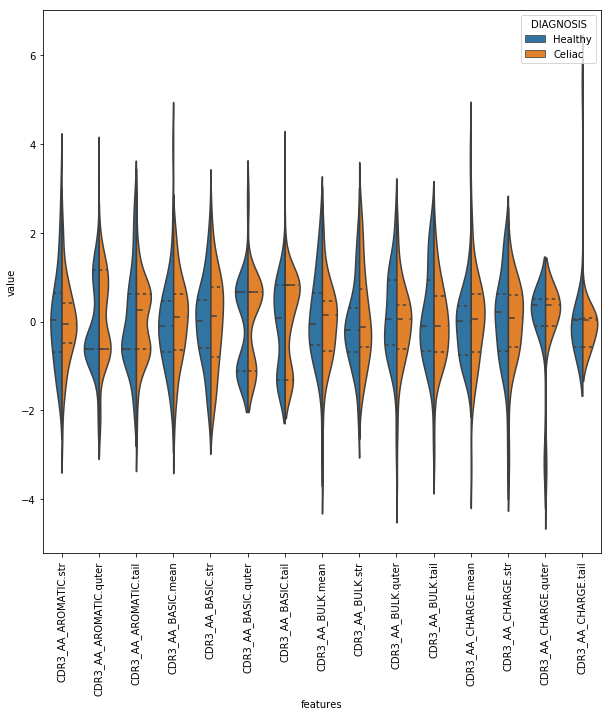

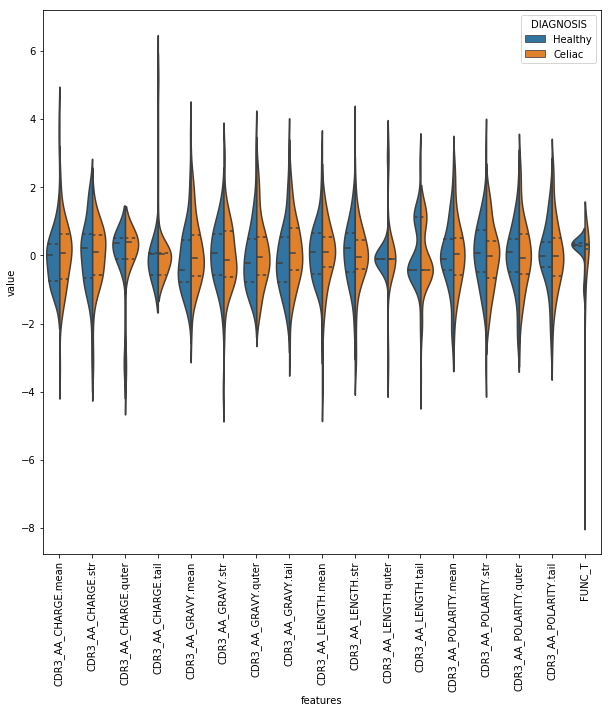

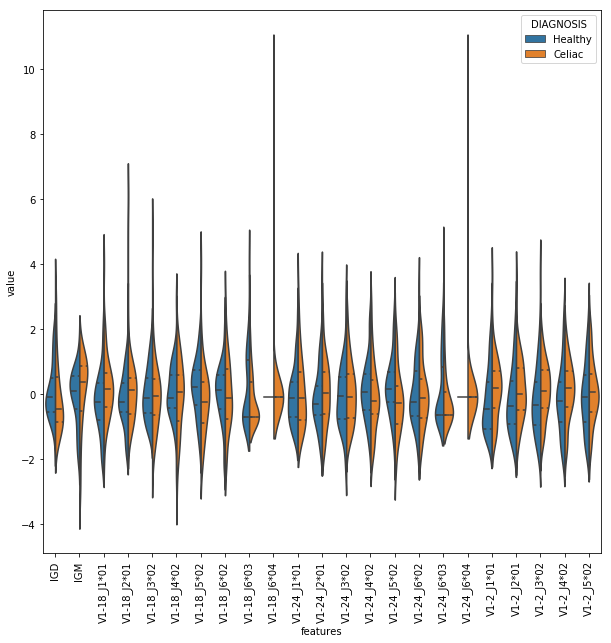

In [52]:
df_gene = df_per_target
df_gene.rename(columns={'CLIN': 'DIAGNOSIS'}, inplace=True) # change CLIN to diagnosis
#seaborn graph
data = df_gene
# y includes our labels and x includes our features
y = data.DIAGNOSIS
data_features =data.loc[:,'CDR3_AA_AROMATIC.str':'CDR3_AA_CHARGE.tail']
# standardization 
data_n_2 = (data_features - data_features.mean()) / (data_features.std())
# binding diagnosis and features data
data_features = pd.concat([y,data_n_2],axis=1)
data_features = pd.melt(data_features,id_vars="DIAGNOSIS",
                    var_name="features",
                    value_name='value')
#create graph
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="DIAGNOSIS", data=data_features ,split=True, inner="quartile")
plt.xticks(rotation=90)

######################
data_features =data.loc[:,'CDR3_AA_CHARGE.mean':'FUNC_T']
# standardization 
data_n_2 = (data_features - data_features.mean()) / (data_features.std())
# binding diagnosis and features data
data_features = pd.concat([y,data_n_2],axis=1)
data_features = pd.melt(data_features,id_vars="DIAGNOSIS",
                    var_name="features",
                    value_name='value')
#create graph
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="DIAGNOSIS", data=data_features ,split=True, inner="quartile")
plt.xticks(rotation=90)

#####################
data_features =data.loc[:,'IGD':'V1-2_J5*02']
# standardization 
data_n_2 = (data_features - data_features.mean()) / (data_features.std())
# binding diagnosis and features data
data_features = pd.concat([y,data_n_2],axis=1)
data_features = pd.melt(data_features,id_vars="DIAGNOSIS",
                    var_name="features",
                    value_name='value')
#create graph
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="DIAGNOSIS", data=data_features ,split=True, inner="quartile")
plt.xticks(rotation=90)

We can recognize more diffrent between the distribution that represent the tails and str.

## 2.2 Kolmogorov Smirnov test (example)
In order to quantify the results we use the KS test.

If the K-S statistic is small or the p-value is high, then we cannot reject the hypothesis that the distributions of the two samples are the same.

In [57]:
# Lets exam the KS of most different distribution as visualize above : 
from scipy import stats
#create distribution for healthy and celiac
df_per_target = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
data_features = df_per_target
dist_healthy = data_features.loc[data_features['CLIN']== 'Healthy']
dist_celiac = data_features.loc[data_features['CLIN']== 'Celiac']

#KS test
dist_healthy_acid = dist_healthy.loc[:,'CDR3_AA_ALIPHATIC.quter']
dist_celiac_acid = dist_celiac.loc[:,'CDR3_AA_ALIPHATIC.quter']
print(stats.ks_2samp(dist_healthy_acid, dist_celiac_acid) )
dist_healthy_acid = dist_healthy.loc[:,'CDR3_AA_ALIPHATIC.tail']
dist_celiac_acid = dist_celiac.loc[:,'CDR3_AA_ALIPHATIC.tail']
print(stats.ks_2samp(dist_healthy_acid, dist_celiac_acid) )
dist_healthy_acid = dist_healthy.loc[:,'CDR3_AA_AROMATIC.mean']
dist_celiac_acid = dist_celiac.loc[:,'CDR3_AA_AROMATIC.mean']
print(stats.ks_2samp(dist_healthy_acid, dist_celiac_acid) )
dist_healthy_acid = dist_healthy.loc[:,'CDR3_AA_BULK.quter']
dist_celiac_acid = dist_celiac.loc[:,'CDR3_AA_BULK.quter']
print(stats.ks_2samp(dist_healthy_acid, dist_celiac_acid) )
dist_healthy_acid = dist_healthy.loc[:,'FUNC_T']
dist_celiac_acid = dist_celiac.loc[:,'FUNC_T']
score = stats.ks_2samp(dist_healthy_acid, dist_celiac_acid)
print(score )

Ks_2sampResult(statistic=0.19357530246141008, pvalue=0.28655599790196024)
Ks_2sampResult(statistic=0.17062995410930332, pvalue=0.43818466495466946)
Ks_2sampResult(statistic=0.182311222361285, pvalue=0.35580004036288754)
Ks_2sampResult(statistic=0.20650813516896116, pvalue=0.21957487476161328)
Ks_2sampResult(statistic=0.18439716312056736, pvalue=0.34220540082273715)


Here, we can not reject the null hypothesis since the pvalues are high, more than 28%. 

#### 2.2.1 let's extract the features with informative distribution(diffrent pattern between cohorts) by loop of calculation KS test and save the ones that have a low pvalue (Pvalue<0.05).

In [89]:
# Lets exam the KS of most different distribution (pvalue<0.05): 
from scipy import stats

#separate data for healthy and celiac
df_per_target = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL') #load data
data_features = df_per_target
dist_healthy = data_features.loc[data_features['CLIN']== 'Healthy']
dist_celiac = data_features.loc[data_features['CLIN']== 'Celiac']

# loop for calculate KS for all the features and save those with pvalue < 0.05
informative_columns_idx = []
informative_columns = []
df = df_per_target
for idx_col in range(3,1046):
    dist_healthy_acid = dist_healthy.iloc[:,idx_col]
    dist_celiac_acid = dist_celiac.iloc[:,idx_col]
    score = stats.ks_2samp(dist_healthy_acid, dist_celiac_acid)
    if score.pvalue < 0.05 :
        print(df.columns[idx_col])
        print(stats.ks_2samp(dist_healthy_acid, dist_celiac_acid) )
        #save the index columns and names
        informative_columns_idx.append(idx_col)
        informative_columns.append(df.columns[idx_col])
    

V6
Ks_2sampResult(statistic=0.2966207759699624, pvalue=0.021025484202870023)
J1
Ks_2sampResult(statistic=0.30496453900709225, pvalue=0.016213810803922094)
V6-1
Ks_2sampResult(statistic=0.2966207759699624, pvalue=0.021025484202870023)
D2-2
Ks_2sampResult(statistic=0.27075511055486023, pvalue=0.04494855481482068)
D3-9
Ks_2sampResult(statistic=0.27075511055486023, pvalue=0.04494855481482068)
V3_J1_x
Ks_2sampResult(statistic=0.3166458072590739, pvalue=0.011133201202406741)
V3_J2_x
Ks_2sampResult(statistic=0.2757613683771381, pvalue=0.03901211431441744)
V6_J6_x
Ks_2sampResult(statistic=0.3216520650813517, pvalue=0.009435629435730303)
V2-5*01
Ks_2sampResult(statistic=0.2774301209845641, pvalue=0.037191481629615886)
V6-1*01
Ks_2sampResult(statistic=0.2966207759699624, pvalue=0.021025484202870023)
D3-9*01
Ks_2sampResult(statistic=0.27075511055486023, pvalue=0.04494855481482068)
J1*01
Ks_2sampResult(statistic=0.34918648310387984, pvalue=0.003626221313866333)
IGD
Ks_2sampResult(statistic=0.28911

The statistic value is the absolute max distance (supremum) between the CDFs of the two samples. The closer this number is to 0 the more likely it is that the two samples were drawn from the same distribution.
We can reject the null hypothesis that the two samples were drawn from the same distribution if the p-value is less than our significance level.

Print and save variable of informative_columns according to KS test (p_value <0.05)


In [412]:
# print and save variable of informative_columns according to KS test (p_value <0.05)
print(informative_columns)
print(informative_columns_idx)

['V6', 'J1', 'V6-1', 'D2-2', 'D3-9', 'V3_J1_x', 'V3_J2_x', 'V6_J6_x', 'V2-5*01', 'V6-1*01', 'D3-9*01', 'J1*01', 'IGD', 'IGM', 'V1-24_J5*02', 'V1-2_J1*01', 'V2-5_J3*02', 'V3-11_J3*02', 'V4-59_J1*01', 'V4-59_J2*01', 'V4-61_J3*02', 'V6-1_J3*02', '9.0-DseqL']
[8, 17, 80, 89, 96, 217, 218, 240, 281, 417, 440, 452, 498, 499, 512, 516, 629, 646, 950, 951, 960, 993, 1045, 1045]


#### 2.2.2 Visualization of the diffrent distributon features by violin graph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

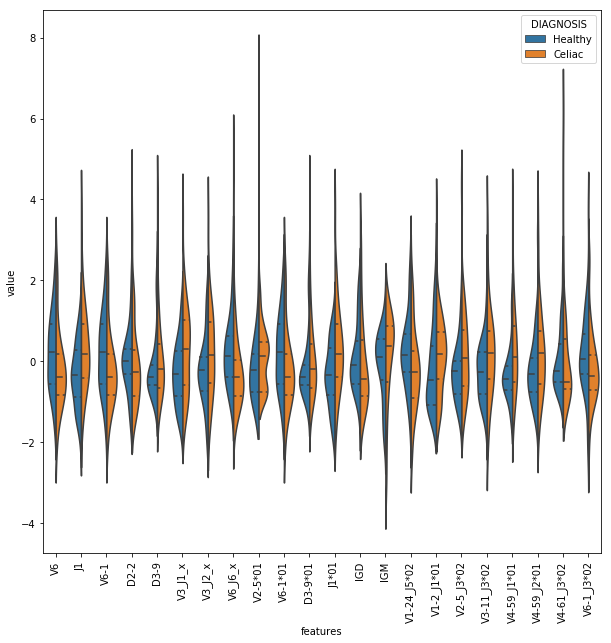

In [93]:
# visualize the distibution by violin graph 
df_gene = df_per_target
df_gene.rename(columns={'CLIN': 'DIAGNOSIS'}, inplace=True) # change CLIN to diagnosis
#seaborn graph
data = df_gene
# y includes our labels and x includes our features
y = data.DIAGNOSIS
data_features =data.iloc[:,informative_columns_idx]
# standardization 
data_n_2 = (data_features - data_features.mean()) / (data_features.std())
# binding diagnosis and features data
data_features = pd.concat([y,data_n_2],axis=1)
data_features = pd.melt(data_features,id_vars="DIAGNOSIS",
                    var_name="features",
                    value_name='value')
#create graph
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="DIAGNOSIS", data=data_features ,split=True, inner="quartile")
plt.xticks(rotation=90)

----------------------------------------------------------------------------------------------

# Step 3: Feature Selection - 2 methods

Due to we seem to have informative results from the KS test, we think to build code for feature selection based on KS test.

How it works: ~~~
10-fold-CV + KS test + choose duplicate choosing features from all the folds together.

--complete explanation --

##  3.1. Feature Selection- Our New Method - based on KS test

In [14]:
# import packages
from scipy import stats #for KS test
import collections # for find duplicate variables
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from collections import Counter

# load data 
df= pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL') #load data
X = df.iloc[:,3:]
y = df.loc[:,'CLIN']

# initialization
seed= 42
informative_columns = []
KS_fold_number = 10
subset_data_percent = 0.8
test_size_fold = 1-subset_data_percent

# loop for merge informative_features from each 10 different subset data.
# informative_features choose if for KS test between celiac&healty distribution 
# the p_value is less then 0.05.
# in order to get different subset in each iteration we used different seeds 
# for train_test_split function
for i in range(1,KS_fold_number):
    # split to 80% data [change seed in each iteration]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size_fold, random_state=seed+i)
    xy_train_subset = x_train
    xy_train_subset.insert(loc=0,column='CLIN',value= list(y_train))
    #separate data to healthy and celiac data
    data_features = xy_train_subset
    dist_healthy = data_features.loc[data_features['CLIN']== 'Healthy']
    dist_celiac = data_features.loc[data_features['CLIN']== 'Celiac']
    # loop for calculate KS test(for each feature name) between Celiac to healthy feature's distribution.
    # and save feature names with pvalue < 0.05
    col_num = len(xy_train_subset.columns.values)
    for idx_col in range(1,col_num):
        dist_healthy_feature = dist_healthy.iloc[:,idx_col]
        dist_celiac_feature = dist_celiac.iloc[:,idx_col]
        score = stats.ks_2samp(dist_healthy_feature, dist_celiac_feature)
        if score.pvalue < 0.05 :
            # save columns names of informative features for this xy_train iteration
            informative_columns.append(xy_train_subset.columns[idx_col])
            # if you want to print each iteration results:
             ##print(xy_train_subset.columns[idx_col])
             ##print(stats.ks_2samp(dist_healthy_feature, dist_celiac_feature) )


            
# Choose the duplicate features
import collections
a = informative_columns
# save list with count numbers of duplicate features
informative_duplicate_count = pd.Series(a).value_counts() 
vc = informative_duplicate_count
# save list of duplicate features's names in decending order
informative_features_after_KS_folds_80 = vc[vc > 2].index.tolist()
# print final result:
print(informative_features_after_KS_folds_80)
print(informative_duplicate_count)

['J1*01', 'V4-59_J1*01', 'V3_J1_x', 'V6_J6_x', 'J1', 'V1-3', 'V6', 'V6-1_J3*02', 'V6-1*01', 'V6-1', 'V3-11_J3*02', 'V4-61_J3*02', 'V3_J6_x', 'D3-9', 'V5_J1_x', 'V3_J2_x', 'V2-5_J3*02', 'IGM', 'D3-9*01', 'V3-49*03', 'V1-3*01', 'V3_J3_x', 'V1-24_J5*02', 'V3-48*01', 'V1-3_J4*02', 'V1-2_J1*01']
J1*01                 9
V4-59_J1*01           9
V3_J1_x               8
V6_J6_x               8
J1                    7
V1-3                  5
V6                    5
V6-1_J3*02            5
V6-1*01               5
V6-1                  5
V3-11_J3*02           5
V4-61_J3*02           4
V3_J6_x               4
D3-9                  4
V5_J1_x               4
V3_J2_x               4
V2-5_J3*02            4
IGM                   4
D3-9*01               4
V3-49*03              3
V1-3*01               3
V3_J3_x               3
V1-24_J5*02           3
V3-48*01              3
V1-3_J4*02            3
V1-2_J1*01            3
V3-64_J1*01           2
IGD                   2
D2-2                  2
V2-5*01     

### 3.1.1 compare performance between training set and test set (fold=1)

In [374]:
# load data 
df= pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL') #load data
X = df.iloc[:,3:]
y = pd.factorize(df_rf['CLIN'])[0]

# initialization
seed= 42
informative_columns = []
KS_fold_number = 2
subset_data_percent = 0.8
test_size_fold = 1-subset_data_percent

# loop for merge informative_features from each 10 different subset data.
# informative_features choose if for KS test between celiac&healty distribution 
# the p_value is less then 0.05.
# in order to get different subset in each iteration we used different seeds 
# for train_test_split function
for i in range(1,KS_fold_number):
    # split to 80% data [change seed in each iteration]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size_fold, random_state=seed+i)
    xy_train_subset = x_train
    xy_train_subset.insert(loc=0,column='CLIN',value= list(y_train))
    #separate data to healthy and celiac data
    data_features = xy_train_subset
    dist_healthy = data_features.loc[data_features['CLIN']== 1]
    dist_celiac = data_features.loc[data_features['CLIN']== 0]
    # loop for calculate KS test(for each feature name) between Celiac to healthy feature's distribution.
    # and save feature names with pvalue < 0.05
    col_num = len(xy_train_subset.columns.values)
    for idx_col in range(1,col_num):
        dist_healthy_feature = dist_healthy.iloc[:,idx_col]
        dist_celiac_feature = dist_celiac.iloc[:,idx_col]
        score = stats.ks_2samp(dist_healthy_feature, dist_celiac_feature)
        if score.pvalue < 0.05:
            # save columns names of informative features for this xy_train iteration
            informative_columns.append(xy_train_subset.columns[idx_col])
            # if you want to print each iteration results:
             ##print(xy_train_subset.columns[idx_col])
             ##print(stats.ks_2samp(dist_healthy_feature, dist_celiac_feature) )

# check performance
#clf = RandomForestClassifier(n_)
clf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=3)  
clf.fit(x_train.loc[:,informative_columns], y_train)
train_pred = clf.predict_proba(x_train.loc[:,informative_columns])  
print('Accuracy on training set: {}'.format(roc_auc_score(y_train, train_pred[:,1])))

test_pred = clf.predict_proba(x_test.loc[:,informative_columns])  
print('Accuracy on test set: {}'.format(roc_auc_score(y_test, test_pred [:,1]))) 

Accuracy on training set: 0.9946127946127946
Accuracy on test set: 0.6190476190476191


### 3.1.2. Visualize the impact of feature selected used PCA (Principal component Analysis)
Because it difficult to visualize high dimensional data, we can use PCA to find the first two principal components. By doing so, we can visualize the data in 2 dimensions for more intuitive look.


PCA for the informative columns (after KS test)

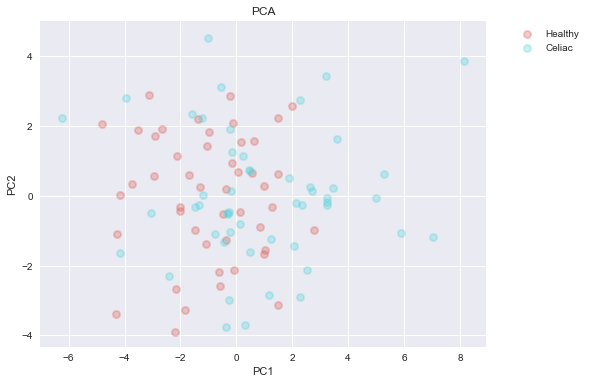

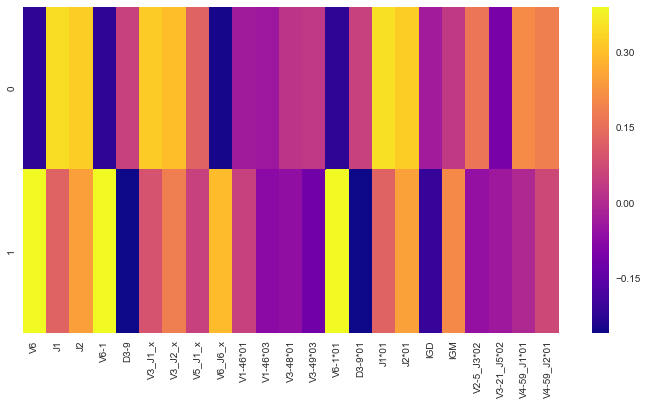

In [375]:
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')

# First, we'll need to scale our data so that each feature has a single unit variance.
from sklearn.preprocessing import scale
scaled_data = scale(df.loc[:,informative_columns])

    
# cellLabels = target_name (H / C)
cellLabels = df.loc[:,'CLIN']
Counter(cellLabels)
target_name = df.CLIN.unique()

#%% PCA:
pca = PCA(n_components=2)
#Now we can transform this data to its first 2 principal components.
X_r = pca.fit_transform(scaled_data )

plt.figure(figsize=(8,6))
colors = sns.color_palette("hls", len(cellLabels.unique()))
lw = 2
for color,  target_name in zip(colors,cellLabels.unique() ) :
    IDX = [i for i,x in enumerate(cellLabels) if x==target_name]
    plt.scatter(X_r[IDX, 0], X_r[IDX, 1], color=color, alpha=.3, lw=lw,
                label=target_name)
plt.legend(loc=2, scatterpoints=1,bbox_to_anchor=(1.05, 1))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA');

# Heat map
df_columns = df.loc[:,informative_columns].columns.values
df_comp = pd.DataFrame(pca.components_,columns=df_columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

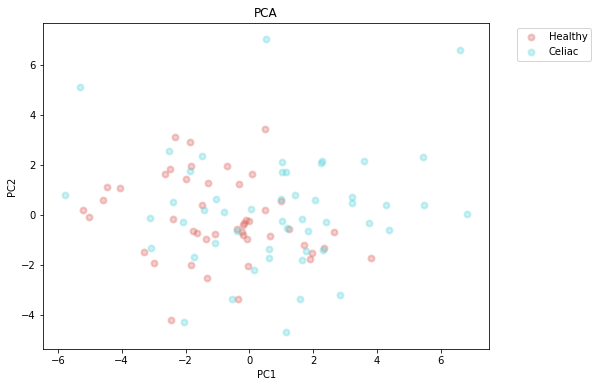

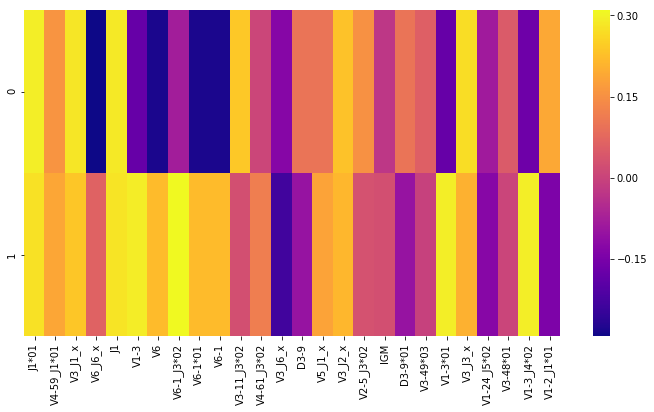

In [15]:
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')

# First, we'll need to scale our data so that each feature has a single unit variance.
from sklearn.preprocessing import scale
scaled_data = scale(df.loc[:,informative_features_after_KS_folds_80])

    
# cellLabels = target_name (H / C)
cellLabels = df.loc[:,'CLIN']
Counter(cellLabels)
target_name = df.CLIN.unique()

#%% PCA:
pca = PCA(n_components=2)
#Now we can transform this data to its first 2 principal components.
X_r = pca.fit_transform(scaled_data )

plt.figure(figsize=(8,6))
colors = sns.color_palette("hls", len(cellLabels.unique()))
lw = 2
for color,  target_name in zip(colors,cellLabels.unique() ) :
    IDX = [i for i,x in enumerate(cellLabels) if x==target_name]
    plt.scatter(X_r[IDX, 0], X_r[IDX, 1], color=color, alpha=.3, lw=lw,
                label=target_name)
plt.legend(loc=2, scatterpoints=1,bbox_to_anchor=(1.05, 1))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA');

# Heat map
df_columns = df.loc[:,informative_features_after_KS_folds_80].columns.values
df_comp = pd.DataFrame(pca.components_,columns=df_columns)
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

This heatmap and the color bar basically represent the correlation between the various feature and the principal component itself.

We can see that the principal components almost can separate patients cohorts.
* For PC1>0, the majority of points are blue(i.e Celiac patients).
* Hence, We can create a new feature that will contain this information, means that, PC1 => 0 represent by 1, and PC1<0 by 0.  [I don't use it because I don't sure if these features are not bias features]

In [16]:
pca.explained_variance_ratio_

array([0.25143114, 0.15215971])

we can see that the first principal component contains 25.14% of the variance and the second principal component contains 15.21% of the variance. Together, the two components contain 40.35% of the information.

## 3.2 Extract important features used Random Forest

**In order to recognize features with high importance score over the 10 folds, We create visualization graph of features importance for each fold**. Finally, we calculate the mean importances of each feature over all the folds and then sort it by descending order.

#### Tuned Hyperparameters
Because feature importances are varying a lot when we used random forest without custom settings [See at 'Whole_Workflow' notebook], we decided to increase the **number of trees**, e.g: 100 to 1000 or 10000. There is no risk of overfitting in random forest with growing number of trees, as they are trained independently from each other.

If feature importances are still varying a lot, features are likely to be redundant (like: feature A gives same amount of information gain as features B and C together)

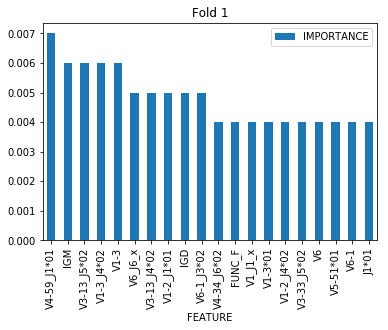

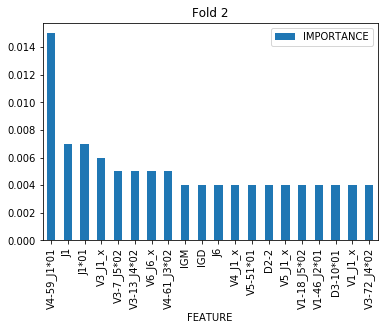

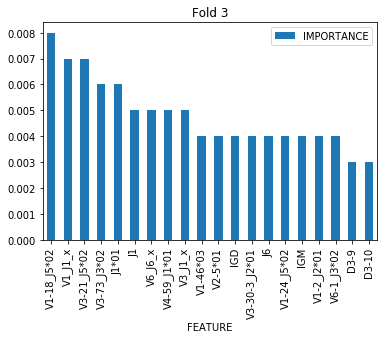

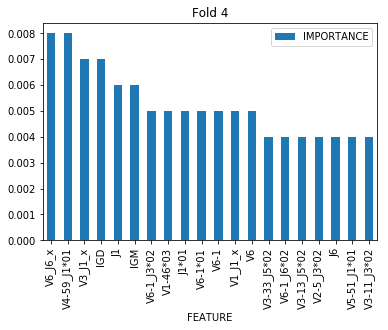

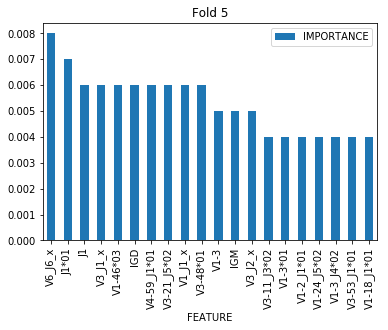

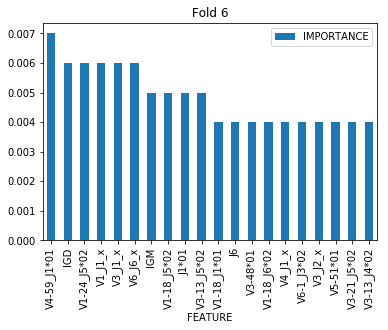

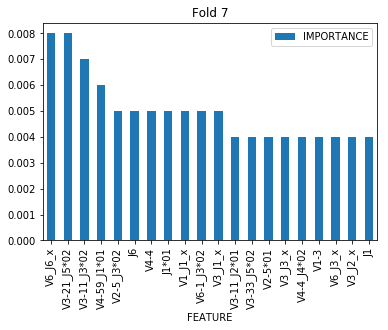

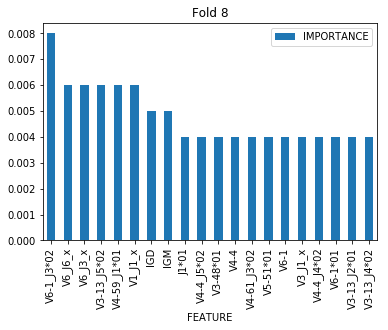

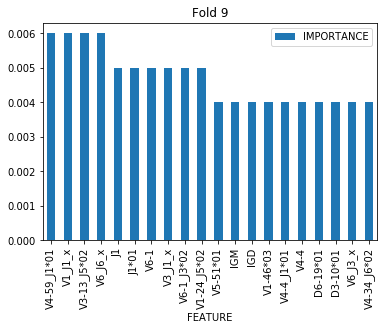

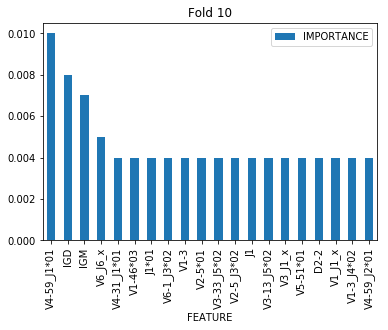

The mean importances of each feature over all the folds
             IMPORTANCE
FEATURE                
V4-59_J1*01      0.0076
V6_J6_x          0.0062
IGD              0.0053
V1_J1_x          0.0053
J1*01            0.0052
V3_J1_x          0.0051
IGM              0.0050
J1               0.0048
V3-21_J5*02      0.0045
V6-1_J3*02       0.0045
V3-13_J5*02      0.0044
V1-46*03         0.0038
V6-1*01          0.0037
V1-24_J5*02      0.0037
V6-1             0.0037
V6               0.0036
V1-18_J5*02      0.0036
V5-51*01         0.0036
V3-11_J3*02      0.0035
V2-5_J3*02       0.0034


In [17]:
#Visualize features importance for each fold by random forest

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification

# load data
df_rf = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')

# splitting to features_data and target
data_x = df_rf.iloc[:,3:]
feature_names = data_x.columns
data_y = pd.factorize(df_rf['CLIN'])[0]

# define K-fold and random forest classifier
kf = KFold(n_splits=10,shuffle = True)
rfc = RandomForestClassifier(n_estimators=10000)
# initialize variables for loop
count = 1
all_importances = pd.DataFrame() 
# test data is not needed for fitting
for train, _ in kf.split(data_x, data_y):
    rfc.fit(data_x.iloc[train,:], data_y[train])
    # sort the feature index by importance score in descending order
    importances_index_desc = np.argsort(rfc.feature_importances_)[::-1]
    feature_labels = [feature_names[i] for i in importances_index_desc]
    importances1 = pd.DataFrame({'FEATURE':data_x.columns,'IMPORTANCE':np.round(rfc.feature_importances_,3)})
    importances = importances1.sort_values('IMPORTANCE',ascending=False).set_index('FEATURE')
    # append importance features of all the folds
    all_importances = all_importances.append(importances1) 
    
    # plot
    plt.figure()
    importances[0:20].plot.bar()
    plt.title('Fold {}'.format(count))
    count = count + 1
plt.show()

# Lets calculate the mean importances of each feature over all the folds and then sort it by descending order.
all_importances_mean = all_importances.groupby('FEATURE').mean()
all_importances_sort = all_importances_mean.sort_values('IMPORTANCE',ascending=False)
print('The mean importances of each feature over all the folds')
# print list of the best importances features
print(all_importances_sort[0:20])

In [18]:
# save the most important list to variable
rf_features_importance = all_importances_sort
rf_important_features_list = list(rf_features_importance.index)
print(rf_important_features_list[0:30])

['V4-59_J1*01', 'V6_J6_x', 'IGD', 'V1_J1_x', 'J1*01', 'V3_J1_x', 'IGM', 'J1', 'V3-21_J5*02', 'V6-1_J3*02', 'V3-13_J5*02', 'V1-46*03', 'V6-1*01', 'V1-24_J5*02', 'V6-1', 'V6', 'V1-18_J5*02', 'V5-51*01', 'V3-11_J3*02', 'V2-5_J3*02', 'J6', 'V6_J3_x', 'V1-3', 'V3-13_J4*02', 'V3-33_J5*02', 'V3_J2_x', 'V4-4', 'V1-2_J1*01', 'V3-48*01', 'D6-19*01']


### select features used training set and check performance with compare to testing set

In [ ]:
# optimize parameters for Random

In [478]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

F1_sum = 0
seed = 42
seed_vector = [10,3,0,2,-5,9]
for i in seed_vector :
        df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')

        train_features, test_features, train_labels, test_labels = train_test_split(  
                                            df.iloc[:,3:], pd.factorize(df_rf['CLIN'])[0],test_size=0.3, random_state=seed + i )
        # select important features
        feature_selector = RandomForestClassifier(n_estimators=100)

        features = feature_selector.fit(train_features, train_labels)

        # sort the feature index by importance score in descending order
        importances_index_desc = np.argsort(feature_selector.feature_importances_)[::-1]
        feature_labels = [feature_names[i] for i in importances_index_desc]
        importances1 = pd.DataFrame({'FEATURE':data_x.columns,'IMPORTANCE':np.round(rfc.feature_importances_,3)})
        importances = importances1.sort_values('IMPORTANCE',ascending=False).set_index('FEATURE')
        # columns' names of importnt features (take the first 30)
        filtered_features = list(rf_features_importance.index)[0:30]
        # Now to see the classification performance of the random forest using important features
        #clf = RandomForestClassifier(n_estimators=100, random_state=23, max_depth=3)  
        clf = GaussianNB()
        clf.fit(train_features.loc[:,filtered_features], train_labels)
        
        print('~~~~~~~~~~~~~~~~~~~~seed: ',seed+i,'~~~~~~~~~~~~~~~~~~~~~~~~~~')

        print(' \n \n ~~~~For Train Set~~~~')
        train_pred = clf.predict(train_features.loc[:,filtered_features])  
        print('Roc_auc on training set: {}'.format(roc_auc_score(train_labels, train_pred)))
        print('Confusion matrix on training set: \n ',(confusion_matrix(train_labels, train_pred)))
        print('F1 on training set: {}'.format(f1_score(train_labels, train_pred)))
        print('precision on training set: {}'.format(precision_score(train_labels, train_pred)))
        print('Accuracy on training set: {}'.format(accuracy_score(train_labels, train_pred)))

        F1_sum = F1_sum + f1_score(test_labels, test_pred) 

        print(' \n \n ~~~~For Test Set~~~~')

        test_pred = clf.predict(test_features.loc[:,filtered_features])  
        print('Roc_auc on test set: {}'.format(roc_auc_score(test_labels, test_pred ))) 
        print('Confision matrix on training set: \n', (confusion_matrix(test_labels, test_pred)))
        print('F1 on training set: {}'.format(f1_score(test_labels, test_pred)))
        print('precision on training set: {}'.format(precision_score(test_labels, test_pred)))
        print('Accuracy on training set: {}'.format(accuracy_score(test_labels, test_pred)))
        print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')



F1_mean = F1_sum/ len(seed_vector)
print('F1 mean over ',len(seed_vector),' folds :' ,F1_mean)

~~~~~~~~~~~~~~~~~~~~seed:  52 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 0.7965367965367965
Confusion matrix on training set: 
  [[29  4]
 [10 25]]
F1 on training set: 0.7812500000000001
precision on training set: 0.8620689655172413
Accuracy on training set: 0.7941176470588235
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.5758928571428572
Confision matrix on training set: 
 [[10  4]
 [ 9  7]]
F1 on training set: 0.5185185185185185
precision on training set: 0.6363636363636364
Accuracy on training set: 0.5666666666666667

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~seed:  45 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 0.7649122807017543
Confusion matrix on training set: 
  [[23  7]
 [ 9 29]]
F1 on training set: 0.7837837837837838
precision on training set: 0.8055555555555556
Accuracy on training set: 0.7647058823529411
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.69004

You can see that the accuracy on training and test sets are not similar which means that our model maybe have overfitting.

In [440]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score


df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')

train_features, test_features, train_labels, test_labels = train_test_split(  
    df.iloc[:,3:], pd.factorize(df_rf['CLIN'])[0],test_size=0.3, random_state=42)
train_features.shape, test_features.shape  

feature_selector = RandomForestClassifier(n_estimators=100)

features = feature_selector.fit(train_features, train_labels)

# sort the feature index by importance score in descending order
importances_index_desc = np.argsort(feature_selector.feature_importances_)[::-1]
feature_labels = [feature_names[i] for i in importances_index_desc]
importances1 = pd.DataFrame({'FEATURE':data_x.columns,'IMPORTANCE':np.round(rfc.feature_importances_,3)})
importances = importances1.sort_values('IMPORTANCE',ascending=False).set_index('FEATURE')
# columns' names of importnt features (take the first 30)
filtered_features = list(rf_features_importance.index)[0:30]
# Now to see the classification performance of the random forest using important features
#clf = RandomForestClassifier(n_estimators=100, random_state=23, max_depth=3)  
clf = GaussianNB()
clf.fit(train_features, train_labels)

print(' \n \n ~~~~For Train Set~~~~')
train_pred = clf.predict(train_features)  
print('Roc_auc on training set: {}'.format(roc_auc_score(train_labels, train_pred)))
print('Confusion matrix on training set: \n ',(confusion_matrix(train_labels, train_pred)))
print('F1 on training set: {}'.format(f1_score(train_labels, train_pred)))
print('precision on training set: {}'.format(precision_score(train_labels, train_pred)))
print('Accuracy on training set: {}'.format(accuracy_score(train_labels, train_pred)))



print(' \n \n ~~~~For Test Set~~~~')

test_pred = clf.predict(test_features)  
print('Roc_auc on test set: {}'.format(roc_auc_score(test_labels, test_pred ))) 
print('Confision matrix on training set: \n', (confusion_matrix(test_labels, test_pred)))
print('F1 on training set: {}'.format(f1_score(test_labels, test_pred)))
print('precision on training set: {}'.format(precision_score(test_labels, test_pred)))
print('Accuracy on training set: {}'.format(accuracy_score(test_labels, test_pred)))


 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 0.8571428571428572
Confusion matrix on training set: 
  [[33  0]
 [10 25]]
F1 on training set: 0.8333333333333333
precision on training set: 1.0
Accuracy on training set: 0.8529411764705882
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.4732142857142857
Confision matrix on training set: 
 [[ 8  6]
 [10  6]]
F1 on training set: 0.42857142857142855
precision on training set: 0.5
Accuracy on training set: 0.4666666666666667


### Hirerchial clustering

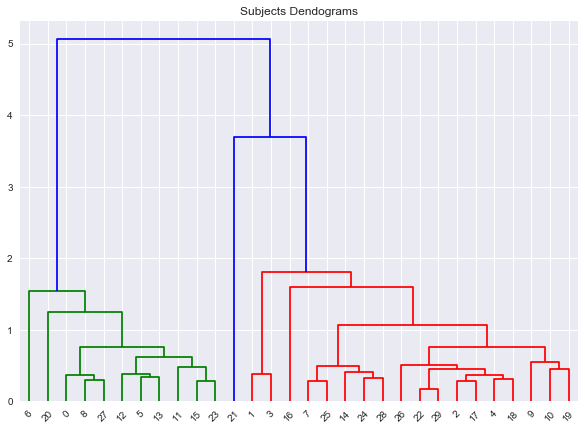

In [459]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np 

# load data 
data = test_features.iloc[:,3:].values  

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Subjects Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  

In [450]:
test_labels

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

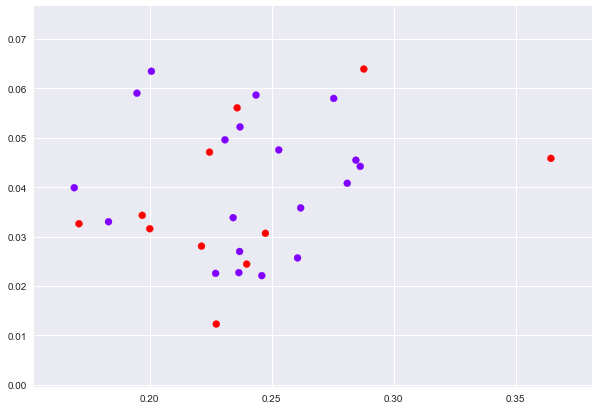

In [464]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data) 
plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow') 

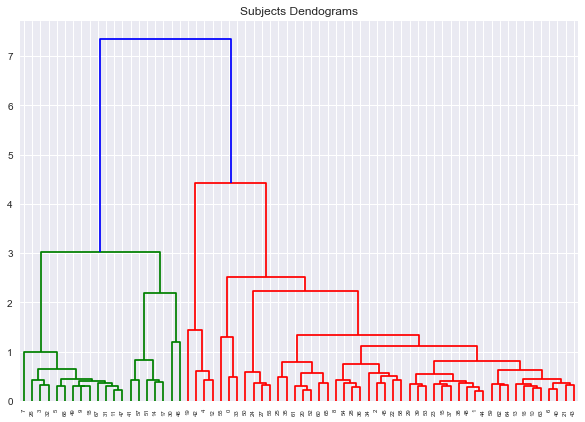

In [442]:
import matplotlib.pyplot as plt  
import pandas as pd  
%matplotlib inline
import numpy as np 

# load data 
data = train_features.iloc[:,3:].values  

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Subjects Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward')) 

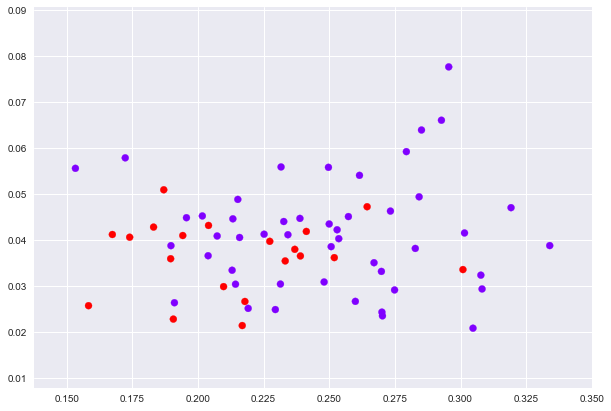

In [446]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data) 
plt.figure(figsize=(10, 7))  
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow') 

### 3.2.1  Visualize the impact of feature selected used PCA (Principal component Analysis)
As we have done for KS selected features, let's look on these RF selected features at 2 dimensions.

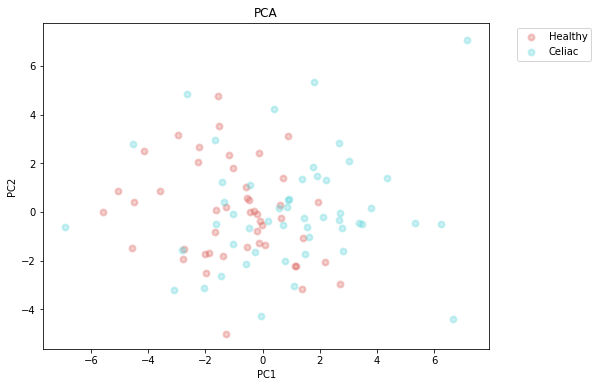

In [19]:
###  Only for Random forest features
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')

# First, we'll need to scale our data so that each feature has a single unit variance.
from sklearn.preprocessing import scale
scaled_data = scale(df.loc[:,rf_important_features_list[0:30]])

    
# cellLabels = target_name (H / C)
cellLabels = df.iloc[:,1]
Counter(cellLabels)
target_name = df.CLIN.unique()

#%% PCA:
pca = PCA(n_components=2)
#Now we can transform this data to its first 2 principal components.
X_r = pca.fit_transform(scaled_data )

plt.figure(figsize=(8,6))
colors = sns.color_palette("hls", len(cellLabels.unique()))
lw = 2
for color,  target_name in zip(colors,cellLabels.unique() ) :
    IDX = [i for i,x in enumerate(cellLabels) if x==target_name]
    plt.scatter(X_r[IDX, 0], X_r[IDX, 1], color=color, alpha=.3, lw=lw,
                label=target_name)
plt.legend(loc=2, scatterpoints=1,bbox_to_anchor=(1.05, 1))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA');

We can see a stronger separation capability than in the PCA of KS features

## 3.3 Comparison between the chosen best informative features  by KS vs Random-Forest
In order to make sure the results are consistent, lets look on the different between the informative_features list by KS test, to feature_importance list according Random forest 

In [23]:
# Lets look on the different between the informative_features by KS test, to feature_importance list according Random forest
print( 'Informative features according KS test (Pvalue<0.05)')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(informative_features_after_KS_folds_80)

print( 'Important features according random forest')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(rf_important_features_list[0:30])

Informative features according KS test (Pvalue<0.05)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['J1*01', 'V4-59_J1*01', 'V3_J1_x', 'V6_J6_x', 'J1', 'V1-3', 'V6', 'V6-1_J3*02', 'V6-1*01', 'V6-1', 'V3-11_J3*02', 'V4-61_J3*02', 'V3_J6_x', 'D3-9', 'V5_J1_x', 'V3_J2_x', 'V2-5_J3*02', 'IGM', 'D3-9*01', 'V3-49*03', 'V1-3*01', 'V3_J3_x', 'V1-24_J5*02', 'V3-48*01', 'V1-3_J4*02', 'V1-2_J1*01']
Important features according random forest
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['V4-59_J1*01', 'V6_J6_x', 'IGD', 'V1_J1_x', 'J1*01', 'V3_J1_x', 'IGM', 'J1', 'V3-21_J5*02', 'V6-1_J3*02', 'V3-13_J5*02', 'V1-46*03', 'V6-1*01', 'V1-24_J5*02', 'V6-1', 'V6', 'V1-18_J5*02', 'V5-51*01', 'V3-11_J3*02', 'V2-5_J3*02', 'J6', 'V6_J3_x', 'V1-3', 'V3-13_J4*02', 'V3-33_J5*02', 'V3_J2_x', 'V4-4', 'V1-2_J1*01', 'V3-48*01', 'D6-19*01']


Combining the 2 list and removing duplicates features(In order to use it as chosen features for the learning machines)

In [25]:
# combining the 2 lists (of KS and RF) and removing duplicates features
first_list = (informative_features_after_KS_folds_80)
second_list = (rf_important_features_list[0:30])

in_first = set(first_list)
in_second = set(second_list)

in_second_but_not_in_first = in_second - in_first

Best_Features_by_KS_and_RF = first_list + list(in_second_but_not_in_first)
print(Best_Features_by_KS_and_RF)

['J1*01', 'V4-59_J1*01', 'V3_J1_x', 'V6_J6_x', 'J1', 'V1-3', 'V6', 'V6-1_J3*02', 'V6-1*01', 'V6-1', 'V3-11_J3*02', 'V4-61_J3*02', 'V3_J6_x', 'D3-9', 'V5_J1_x', 'V3_J2_x', 'V2-5_J3*02', 'IGM', 'D3-9*01', 'V3-49*03', 'V1-3*01', 'V3_J3_x', 'V1-24_J5*02', 'V3-48*01', 'V1-3_J4*02', 'V1-2_J1*01', 'V1-18_J5*02', 'V3-33_J5*02', 'V5-51*01', 'V6_J3_x', 'V3-21_J5*02', 'IGD', 'V4-4', 'V3-13_J5*02', 'J6', 'D6-19*01', 'V1_J1_x', 'V1-46*03', 'V3-13_J4*02']


Look on The features that chosen to be informative by the 2 methods (the duplicate values between the 2 list)

In [27]:
# the duplicate values between the 2 list
a = first_list + second_list
import collections
Duplicate_Features_in_KS_and_RF = list(set([x for x in a if a.count(x) > 1]))
print(Duplicate_Features_in_KS_and_RF)

['J1', 'V6_J6_x', 'V3_J2_x', 'V6', 'V6-1_J3*02', 'V1-2_J1*01', 'V6-1', 'V1-24_J5*02', 'V1-3', 'V2-5_J3*02', 'IGM', 'V3-48*01', 'V3-11_J3*02', 'V4-59_J1*01', 'J1*01', 'V3_J1_x', 'V6-1*01']


It is interesting to examine these features in a follow-up study.

## 3.4 Visualization of the impact of 'informative_features' on health status
Here, we want to look on the distribution of the informative features as determined according KS test and random forest. We want to check that the features are reliable and not derived from outliers sequences in the repertoire.

**Expression of J1 Gene**

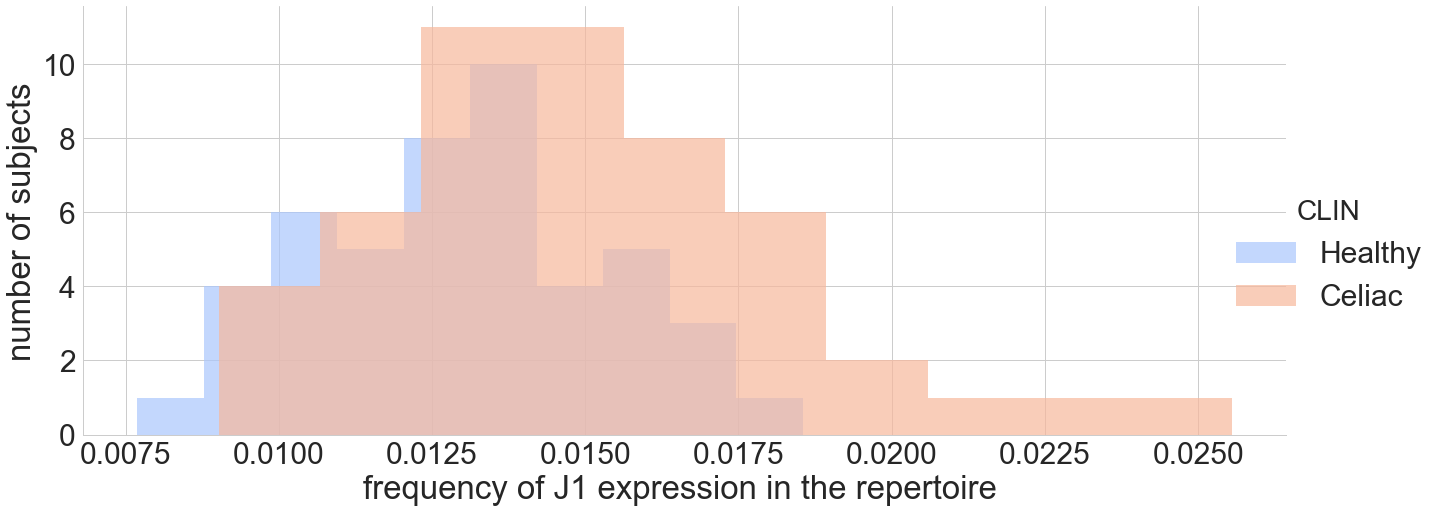

In [33]:
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=3, rc={"lines.linewidth": 2.5})
g = sns.FacetGrid(df,hue="CLIN",palette='coolwarm',size=8,aspect=3)
g = g.map(plt.hist,'J1',bins=10,alpha=0.7).add_legend().set_axis_labels(
    "frequency of J1 expression in the repertoire ", "number of subjects")
g.fig.set_size_inches(20,8)


Percentage of the number of patients from the total number of patients in the data(H=47,C=51)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Percent of Healthy :  0.5294117647058824
Percent of Celiac :  0.2765957446808511


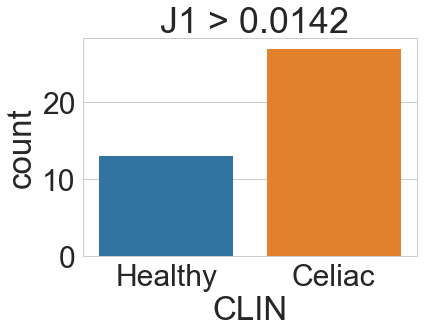

In [41]:
df_sub = df[df.loc[:,'J1']>0.0142]
ax = sns.countplot(df_sub.loc[:,'CLIN'],label="Count")  
C, H = df_sub.loc[:,'CLIN'].value_counts()
ax.set_title(' J1 > 0.0142')
print('Percentage of the number of patients from the total number of patients in the data(H=47,C=51)')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Percent of Healthy : ',C/51)
print('Percent of Celiac : ',H/47)

Celiac patients have a greater expression of J1 gene than healty ones.
There is a 25% difference between the percentage of patients who express J1 more strongly

**Expression of J6 gene**

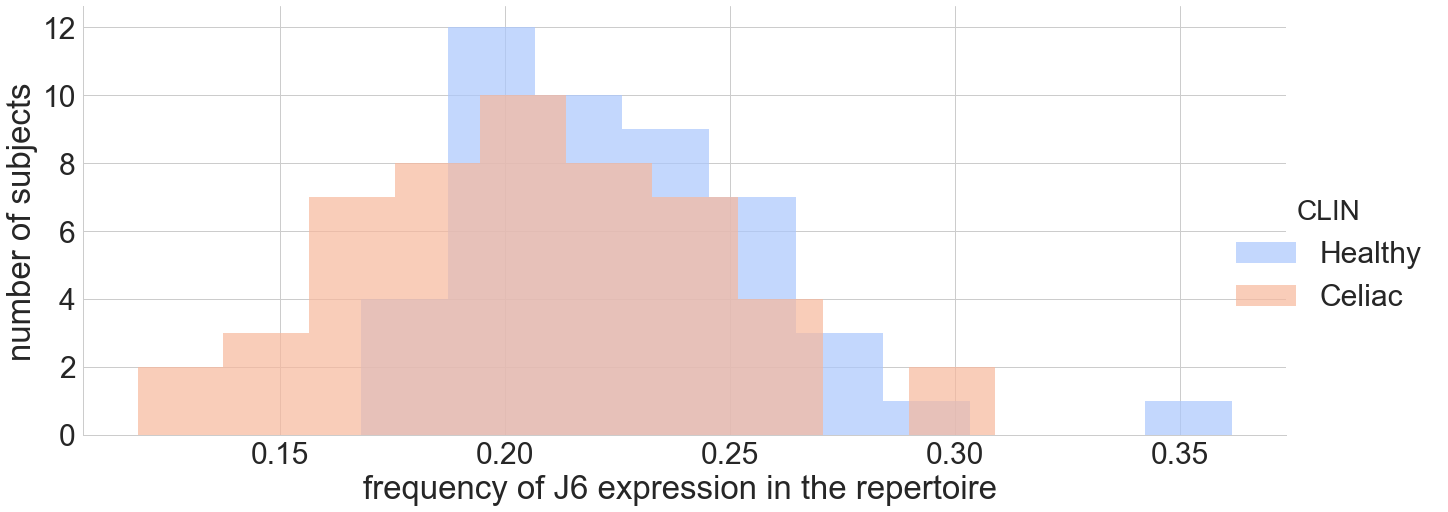

In [119]:
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=3, rc={"lines.linewidth": 2.5})
g = sns.FacetGrid(df,hue="CLIN",palette='coolwarm',size=8,aspect=3)
g = g.map(plt.hist,'J6',bins=10,alpha=0.7).add_legend().set_axis_labels(
    "frequency of J6 expression in the repertoire ", "number of subjects")
g.fig.set_size_inches(20,8)


Percentage of the number of patients from the total number of patients in the data(H=47,C=51)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Percent of Healthy :  0.7450980392156863
Percent of Celiac :  0.6170212765957447


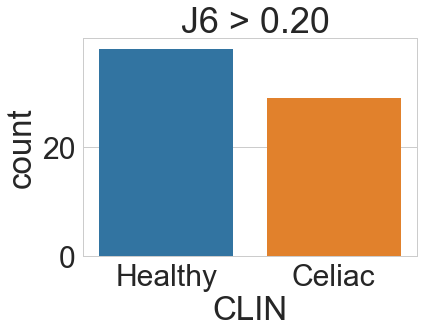

In [43]:
df_sub = df[df.loc[:,'J6']>0.20]
ax = sns.countplot(df_sub.loc[:,'CLIN'],label="Count")      # H = 15, C = 49
C, H = df_sub.loc[:,'CLIN'].value_counts()
ax.set_title(' J6 > 0.20')
print('Percentage of the number of patients from the total number of patients in the data(H=47,C=51)')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Percent of Healthy : ',C/51)
print('Percent of Celiac : ',H/47)

Healthy patients have a greater expression of J6 gene than celiac ones.
There is a 13% difference between the percentage of patients who express J6 more strongly.

**Expression of V-6 gene**

In [ ]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

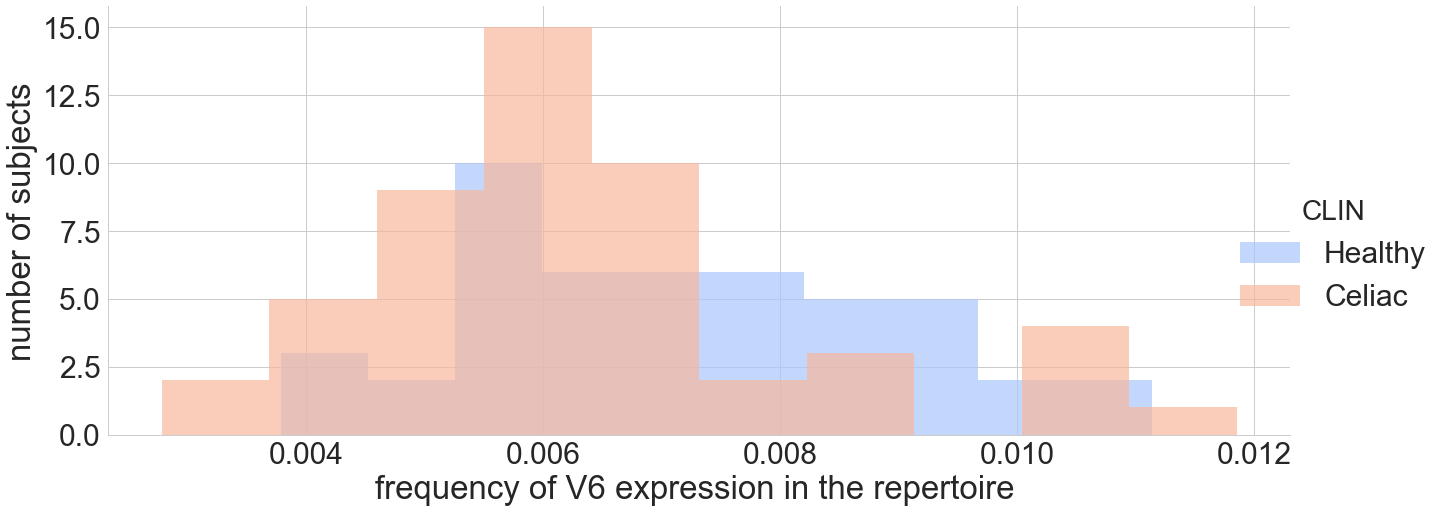

In [120]:
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=3, rc={"lines.linewidth": 2.5})
g = sns.FacetGrid(df,hue="CLIN",palette='coolwarm',size=8,aspect=3)
g = g.map(plt.hist,'V6',bins=10,alpha=0.7).add_legend().set_axis_labels(
    "frequency of V6 expression in the repertoire ", "number of subjects")
g.fig.set_size_inches(20,8)

Percentage of the number of patients from the total number of patients in the data(H=47,C=51)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Percent of Healthy :  0.49019607843137253
Percent of Celiac :  0.3404255319148936


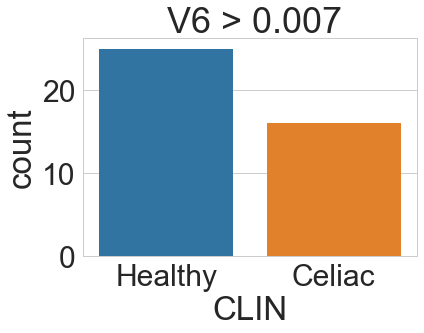

In [44]:
df_sub = df[df.loc[:,'V6']>0.007]
ax = sns.countplot(df_sub.loc[:,'CLIN'],label="Count")      # H = 15, C = 49
C, H = df_sub.loc[:,'CLIN'].value_counts()
ax.set_title(' V6 > 0.007')
print('Percentage of the number of patients from the total number of patients in the data(H=47,C=51)')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Percent of Healthy : ',C/51)
print('Percent of Celiac : ',H/47)

Healthy patients have a greater expression of J6 gene than celiac ones.
There is a 15% difference between the percentage of patients who express V6 more strongly.

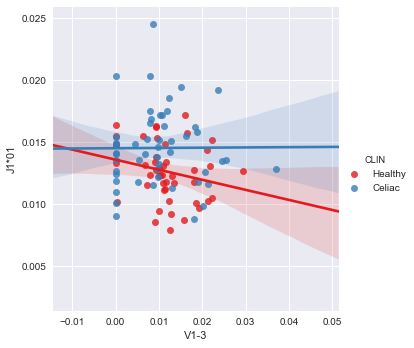

In [127]:
plt.figure(figsize=(11,7))
sns.lmplot(y='J1*01',x='V1-3',data=df,hue='CLIN',palette='Set1')
sns.despine()


### 3.4.1 Continued analyzed based on Visualization

**# Correlation map**

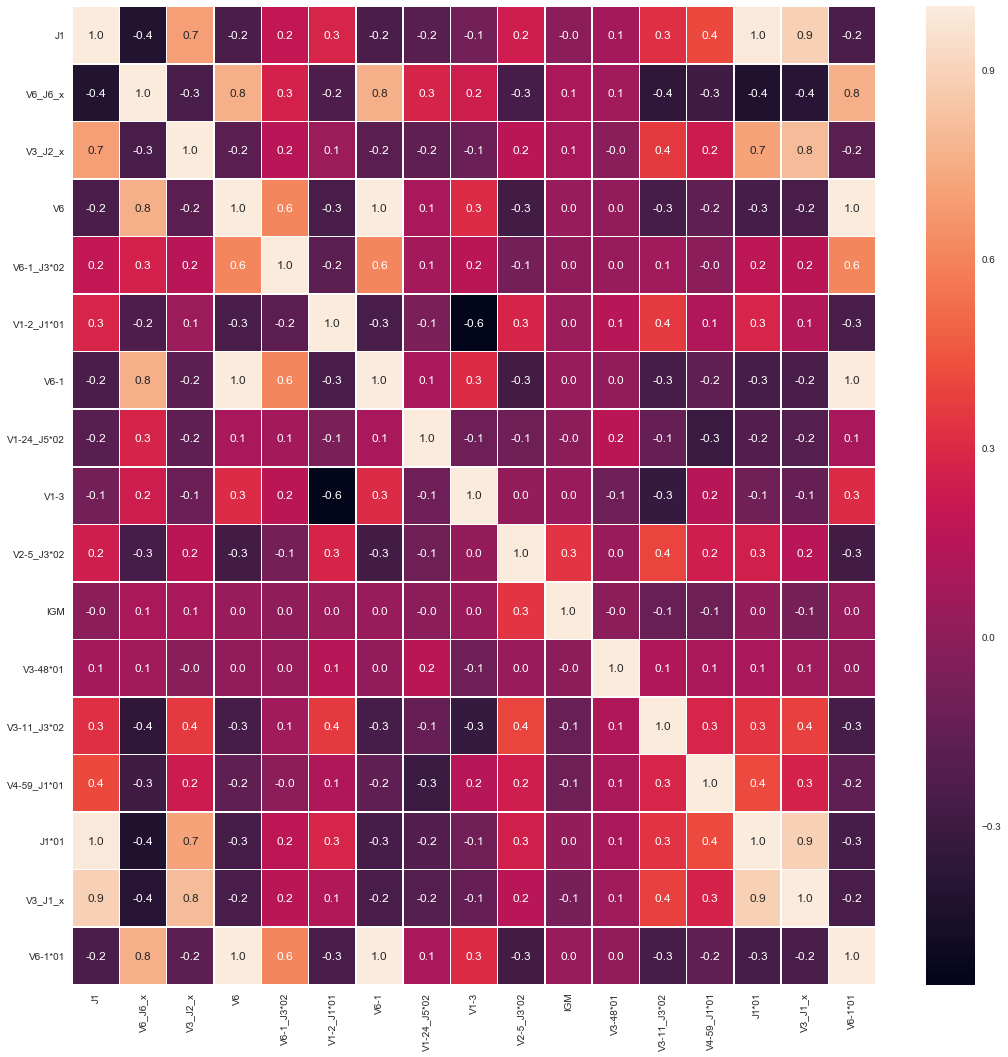

In [46]:
#correlation map
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
f,ax = plt.subplots(figsize=(18, 18))
t = df.loc[:,Duplicate_Features_in_KS_and_RF]
sns.heatmap(t.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Lets look on correlations that bigger than 0.6 
* Some intersting correlation result are genes that goes always with the same allele, like **V6-1** with **V6-1-01** ,this result cause for clearly understand of the correlation(0.9) between **V6_J6** with **V6-1*01**. In this case we don't remove correlation features because we don't interested on find features, but want to maximaize the prediction results. However, it would be intersting to explore these cases in another work.
* Another intersting case is the correlation(0.7) between **V3-J2** with **J1**. In this case, it may be informative to look on the ratio between this two columns. 

**# Pair plot for identified couple of features which can be well separated by classification to diagnosis status**

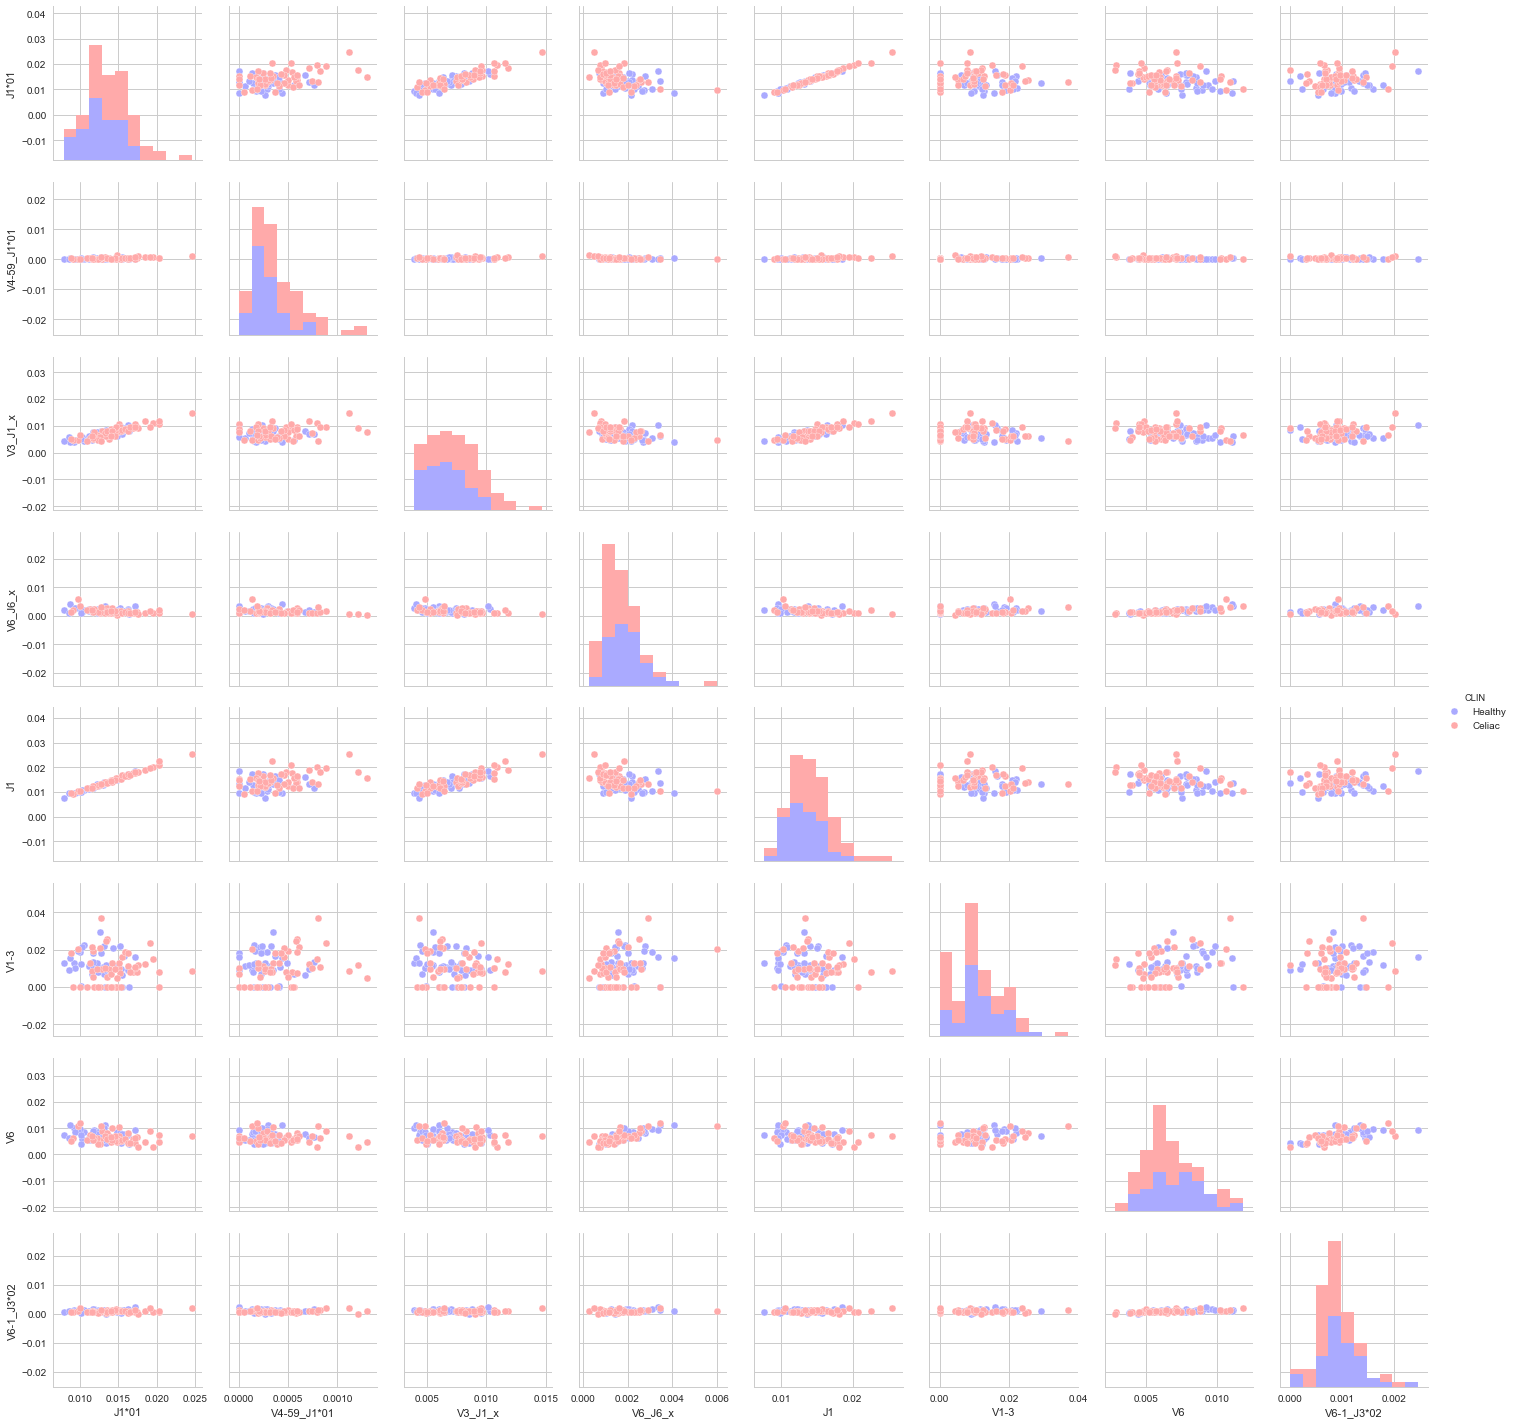

In [48]:
# Pair plot for identified couple of features which
# can be well separated by classification to diagnosis status.
import seaborn as sns
aList = informative_features_after_KS_folds_80[:8]
aList.append('CLIN')
sns.pairplot(df.loc[:,aList],hue='CLIN',palette='bwr')

Unfortunately, it is hardly to see cases where the points(diffrent diagnosis case) are well seperated.

------------------------------------------------------------------------------------------------------

# Step 4: Learning Algorithms

After completing the data preprocessing. it’s time to implement machine learning algorithm on it. We are going to compare 4  learning algorithms in this project. Random Forests, Logistic Regression, SVM and GussianNB. Firstly, we will find the best hyperparameters for each model and look at model's evaluation. Secondly, We will try to improve our models performance using 10-fold Cross Validation.

## 4.1 Load packages:

In [ ]:
# Required Python Machine learning Packages
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon
# To split the dataset into train and test datasets
from sklearn.cross_validation import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score



## 4.2 Random Forest

### 4.2.1 Tuned Hyperparameter - Random Forest

In [250]:

# load data 
df= pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL') #load data
features = df.iloc[:,3:]
#features = df.loc[:,informative_features_after_KS_folds_80]
#target = df.loc[:,'CLIN']
target = pd.factorize(df['CLIN'])[0]

# split data
seed = 42
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=seed)

# Create base model
rf = RandomForestClassifier()
# Searching for the right parameters
param_grid = { 
    'n_estimators': [100, 200, 500 ,800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 8, 90, 100],
    'criterion' :['gini', 'entropy'],
    'min_samples_split': [8, 10, 12]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10) 
clf = grid_search.fit(x_train,y_train)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(grid_search.best_params_)

Parameters currently in use:

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto', 'min_samples_split': 8, 'n_estimators': 100}


**For features selected:**

In [252]:

# load data 
df= pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL') #load data
#features = df.iloc[:,3:]
features = df.loc[:,informative_features_after_KS_folds_80]
#target = df.loc[:,'CLIN']
target = pd.factorize(df['CLIN'])[0]

# split data
seed = 42
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=seed)

# Create base model
rf = RandomForestClassifier()
# Searching for the right parameters
param_grid = { 
    'n_estimators': [100, 200, 500 ,800],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4, 8, 90, 100],
    'criterion' :['gini', 'entropy'],
    'min_samples_split': [8, 10, 12]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10) 
clf = grid_search.fit(x_train,y_train)
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(grid_search.best_params_)

Parameters currently in use:

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 100}


### 4.2.2 Prediction and Evaluations - Random Forest

             precision    recall  f1-score   support

          0       0.58      0.79      0.67        14
          1       0.73      0.50      0.59        16

avg / total       0.66      0.63      0.63        30



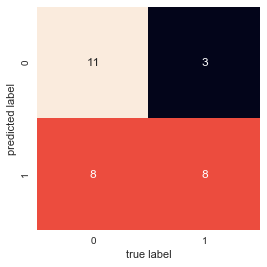

In [222]:
# load data 
df= pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL') #load data
features = df.iloc[:,3:]
#features = df.loc[:,informative_features_after_KS_folds_80]
#target = df.loc[:,'CLIN']
target = pd.factorize(df['CLIN'])[0]
# split data
seed = 42
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=seed,shuffle=True)
# tuned model 
model = RandomForestClassifier()
model.fit(x_train,y_train)
# prediction
y_pred = model.predict(x_test)
# classification report for the model
conf_mat = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(4,8.27)})
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

# 4.3 SVC 

Due to the number of features are very large compared to the number of data points, It can bog down some learning algorithms, making training time unfeasibly long. Support Vector Machines are particularly well suited to this case.

In order to ensure that the outputs of all the Runs will be equal, we set 'random_state' to be 42.

### 4.3.1 Tuned Hyperparameter - SVC

In [224]:
from sklearn.svm import SVC

# load data 
df= pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL') #load data
features = df.iloc[:,3:]
#features = df.loc[:,informative_features_after_KS_folds_80]
#target = df.loc[:,'CLIN']
target = pd.factorize(df['CLIN'])[0]

# split data
seed = 42
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=seed)

# Create base model
model_base = SVC(random_state=42)
# Searching for the right parameters
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=model_base, param_grid=param_grid, cv= 10) 
clf = grid_search.fit(x_train,y_train)
# Look at parameters used by our current forest
print('Tuned Hyperparameters:\n')
print(grid_search.best_params_)
print(grid_search.best_estimator_,'\n')

Tuned Hyperparameters:

{'C': 100, 'gamma': 0.01}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False) 



**Gridsearch - finding the right parameters**
We found that the right parameters for our SVC model are 'C'=100 and 'gamma'=0.01, after fitting the right grid, we got better results in the confusion matrix.

### 4.3.2 Prediction and evaluations - SVC

             precision    recall  f1-score   support

          0       0.42      0.36      0.38        14
          1       0.50      0.56      0.53        16

avg / total       0.46      0.47      0.46        30



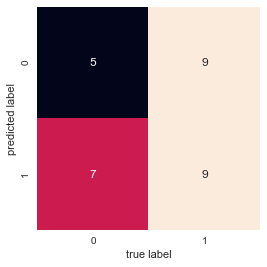

In [225]:
# tuned model 
model = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False) 
model.fit(x_train,y_train)

# prediction
y_pred = model.predict(x_test)

# classification report for the model
conf_mat = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(4,8.27)})
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

# 4.4 Logistic Regression

### 4.4.1 Tuned hyperparameters - LR

**Tuned Hyperparameters for all features**

In [231]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

# Data- split to train and test sets:
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
train_df = df.iloc[:,3:]
y = pd.factorize(df['CLIN'])[0]
x_train, x_test, y_train, y_test = train_test_split(train_df, y, test_size=0.3, random_state=40)

logreg=LogisticRegression(random_state=42)

C_distr = expon(scale=2)
param_grid_random = {'C': C_distr, 'penalty': ['l1', 'l2']}

randomsearch = RandomizedSearchCV(logreg, param_grid_random, n_iter=5)

randomsearch.fit(x_train, y_train);
# Look at parameters used by our current forest
print('Tuned Hyperparameters for all features:\n')
print(randomsearch.best_params_)
print(randomsearch.best_estimator_,'\n')

Tuned Hyperparameters for all features:

{'C': 0.28273756267323114, 'penalty': 'l1'}
LogisticRegression(C=0.28273756267323114, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) 



**Tuned Hyperparameters for features selected**

In [232]:

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon

# Data- split to train and test sets:
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
train_df = df.loc[:,Best_Features_by_KS_and_RF]
y = pd.factorize(df['CLIN'])[0]
x_train, x_test, y_train, y_test = train_test_split(train_df, y, test_size=0.3, random_state=40)

logreg=LogisticRegression(random_state=42)

C_distr = expon(scale=2)
param_grid_random = {'C': C_distr, 'penalty': ['l1', 'l2']}

randomsearch = RandomizedSearchCV(logreg, param_grid_random, n_iter=5)

randomsearch.fit(x_train, y_train);
# Look at parameters used by our current forest
print('Tuned Hyperparameters for features selected:\n')
print(randomsearch.best_params_)
print(randomsearch.best_estimator_,'\n')

Tuned Hyperparameters for features selected:

{'C': 2.122717141019817, 'penalty': 'l2'}
LogisticRegression(C=2.122717141019817, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) 



### 4.4.2 Prediction and evaluation - LR
Set the best parameters and look on prediction

             precision    recall  f1-score   support

          0       0.43      1.00      0.60        13
          1       0.00      0.00      0.00        17

avg / total       0.19      0.43      0.26        30



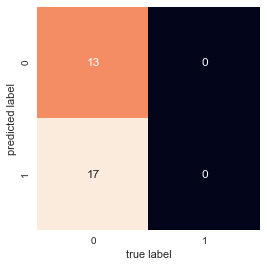

In [240]:
# Data- split to train and test sets:
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
train_df = df.iloc[:,3:]
y = pd.factorize(df['CLIN'])[0]
x_train, x_test, y_train, y_test = train_test_split(train_df, y, test_size=0.3, random_state=40)

# tuned model 
model = LogisticRegression(C=0.28273756267323114, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) 
model.fit(x_train,y_train)
# prediction
y_pred = model.predict(x_test)

# classification report for the model
conf_mat = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(4,8.27)})
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

**classifier evaluate for features selected**

             precision    recall  f1-score   support

          0       0.43      0.77      0.56        13
          1       0.57      0.24      0.33        17

avg / total       0.51      0.47      0.43        30



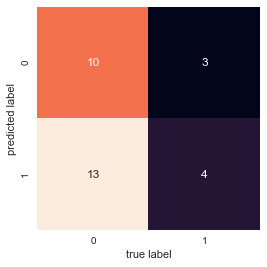

In [237]:
# Data- split to train and test sets:
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
train_df = df.loc[:,Best_Features_by_KS_and_RF]
y = pd.factorize(df['CLIN'])[0]
x_train, x_test, y_train, y_test = train_test_split(train_df, y, test_size=0.3, random_state=40)

# tuned model 
model = LogisticRegression(C=2.122717141019817, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) 
model.fit(x_train,y_train)
# prediction
y_pred = model.predict(x_test)

# classification report for the model
conf_mat = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(4,8.27)})
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

# 4.5 Gaussian Naive Bayes

There isn't a hyper-parameter to tune, so we don't use GridSearchCV. The priors class set to [0.5,0.5], because meantime we don't have a priorities about being belong to healthy or celiac cohort.



**4.5.1 Evaluate classifier for all the features**

             precision    recall  f1-score   support

          0       0.43      0.77      0.56        13
          1       0.57      0.24      0.33        17

avg / total       0.51      0.47      0.43        30



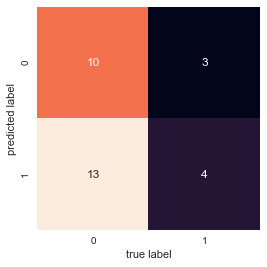

In [243]:
# Import packages

# Required Python Machine learning Packages
import pandas as pd
import numpy as np
# For preprocessing the data
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
# To split the dataset into train and test datasets
from sklearn.cross_validation import train_test_split
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB
# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score

# Data- split to train and test sets:
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
train_df = df.iloc[:,3:]
y = pd.factorize(df['CLIN'])[0]
x_train, x_test, y_train, y_test = train_test_split(train_df, y, test_size=0.3, random_state=40)

# tuned model 
model = GaussianNB()
model.fit(x_train,y_train)
# prediction
y_pred = model.predict(x_test)

# classification report for the model
conf_mat = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(4,8.27)})
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))


**4.5.2 Evaluate GaussianNB model for the informative features:**

             precision    recall  f1-score   support

          0       0.57      0.92      0.71        13
          1       0.89      0.47      0.62        17

avg / total       0.75      0.67      0.65        30



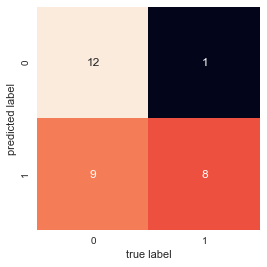

In [242]:
# Data- split to train and test sets:
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
train_df = df.loc[:,Best_Features_by_KS_and_RF]
y = pd.factorize(df['CLIN'])[0]
x_train, x_test, y_train, y_test = train_test_split(train_df, y, test_size=0.3, random_state=40)

# tuned model 
model = GaussianNB()
model.fit(x_train,y_train)
# prediction
y_pred = model.predict(x_test)

# classification report for the model
conf_mat = confusion_matrix(y_test, y_pred)
sns.set(rc={'figure.figsize':(4,8.27)})
sns.heatmap(conf_mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

Awesome! Our model's results improved by ~22%. 

## 4.6 Compare Machine Learning Algorithms 

Once we have found all the appropriate parameters for each model, we'd like to compare their performance.

The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data.

We achieve this by forcing each algorithm to be evaluated on a consistent test harness.

###  Improve our model performance using Cross Validation
The 10-fold cross validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithms is evaluated in precisely the same way.
* We Randomly split our entire dataset into k”folds”
* For each k-fold in our dataset, we build model on k – 1 folds of the dataset. Then, test the model to check the effectiveness for kth fold
* we record the error on each of the predictions
* Repeat this until each of the k-folds has served as the test set
* The average of k recorded errors is called the cross-validation error and will serve as our performance metric for the model

Now, all we need to do is, use the cross_val_score() function to compare the 3 algorithms, and find which one performs best for that dataset.

We tried diffrent types of cross-validation split data


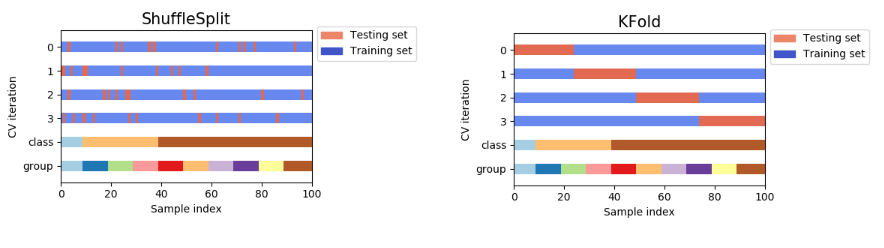

In [265]:
from IPython.display import Image
print('We tried diffrent types of cross-validation split data')
Image(filename='CV_types.png')

accuracy results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.612222 (0.153273)
RF: 0.613333 (0.206368)
NB: 0.620000 (0.134971)
SVM: 0.643333 (0.143109)
KNN: 0.548889 (0.142222)
DT: 0.507778 (0.109663)


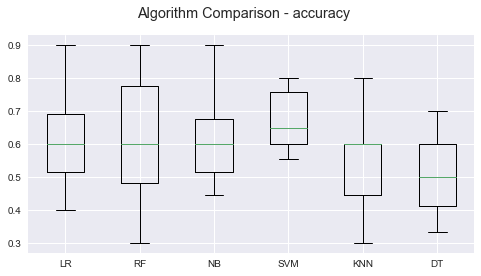

f1_macro results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.485654 (0.200076)
RF: 0.512269 (0.192913)
NB: 0.513599 (0.195966)
SVM: 0.525438 (0.181128)
KNN: 0.461336 (0.173986)
DT: 0.452367 (0.157070)


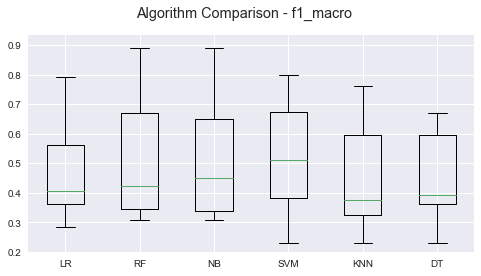

recall results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.495833 (0.365248)
RF: 0.497500 (0.374241)
NB: 0.475833 (0.329529)
SVM: 0.476667 (0.322077)
KNN: 0.412500 (0.293524)
DT: 0.469167 (0.373684)


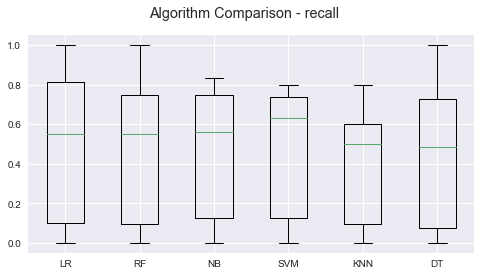

precision results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.574444 (0.397990)
RF: 0.587143 (0.410796)
NB: 0.611905 (0.422718)
SVM: 0.616667 (0.434933)
KNN: 0.566667 (0.401040)
DT: 0.530556 (0.385334)


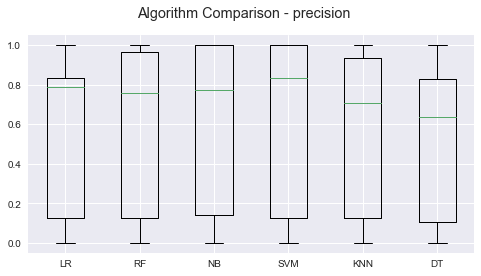

In [249]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import random

# when we have no healthy or celiac target in the test set we get an warning for f1 & recall scores
# In order not to see warnings we used:
import warnings
warnings.filterwarnings("ignore")

# load dataset
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
X = df.loc[:,rf_important_features_list[0:30]]
#Y = df.loc[:,'CLIN']
Y = pd.factorize(df['CLIN'])[0]  # represent cohorts by binary numbers

# prepare configuration for cross validation test harness
# Enter seed before all model defenition!! 
seed = 7
# try diffrent cross-validation(cv) technique
cv_shuffel = model_selection.ShuffleSplit(n_splits=10, test_size=0.3, random_state=seed)
kfold = model_selection.KFold(n_splits=10, random_state=seed)


# Enter seed before all model defenition!! 
random.seed(1234)
# prepare models
models = []
models.append(('LR', LogisticRegression(C=1000,penalty='l2')))
models.append(('RF', RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'log2', n_estimators=200)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
                      decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
                      max_iter=-1, probability=False, random_state=None, shrinking=True,
                      tol=0.001, verbose=False)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))

# loop for calculate different scores
scoring_name_list= ["accuracy", "f1_macro", "recall","precision"]
for score_name in scoring_name_list:
    # evaluate each model in turn
    results = []
    names = []
    Scoring = score_name
    print(Scoring, 'results after 10-fold CV:')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    for name, model in models:
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=Scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    # boxplot algorithm comparison
    fig = plt.figure(figsize=(8,4))
    title = 'Algorithm Comparison' + ' - ' +score_name
    fig.suptitle(title)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()



The above results show that for SVC algorithm we get the highest scores but still low.

Compare algorithms for all features:

accuracy results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.190000 (0.221133)
RF: 0.302222 (0.243168)
NB: 0.635556 (0.145110)
SVM: 0.407778 (0.183253)
KNN: 0.414444 (0.153563)
DT: 0.535556 (0.236737)


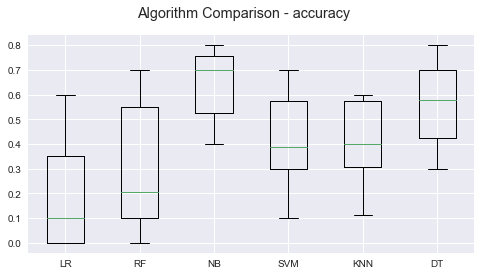

f1_macro results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.132738 (0.145853)
RF: 0.269675 (0.266265)
NB: 0.483587 (0.117006)
SVM: 0.319121 (0.144642)
KNN: 0.332554 (0.134620)
DT: 0.439317 (0.162647)


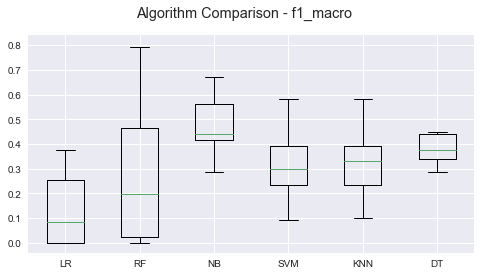

recall results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.300000 (0.458258)
RF: 0.321667 (0.272672)
NB: 0.308333 (0.230850)
SVM: 0.347500 (0.363051)
KNN: 0.383333 (0.290760)
DT: 0.447500 (0.353279)


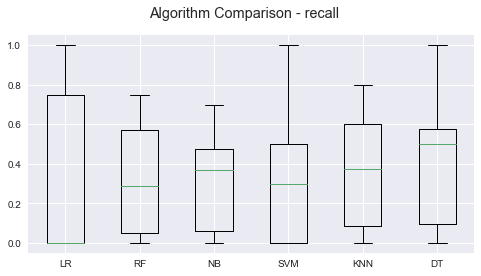

precision results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.150000 (0.233452)
RF: 0.479048 (0.371527)
NB: 0.633333 (0.433333)
SVM: 0.461905 (0.431469)
KNN: 0.470000 (0.356539)
DT: 0.534921 (0.381963)


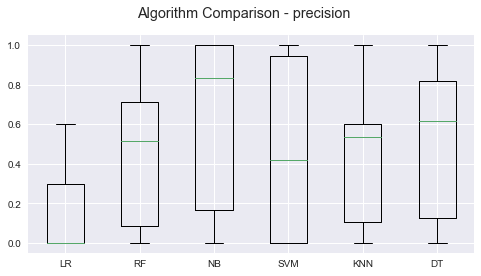

In [256]:
# Compare Algorithms - for all the features
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import random

# when we have no healthy or celiac target in the test set we get an warning for f1 & recall scores
# In order not to see warnings we used:
import warnings
warnings.filterwarnings("ignore")

# load dataset
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
X = df.iloc[:,3:]
#Y = df.loc[:,'CLIN']
Y = pd.factorize(df['CLIN'])[0]  # represent cohorts by binary numbers

# prepare configuration for cross validation test harness
# Enter seed before all model defenition!! 
seed = 7
# try diffrent cross-validation(cv) technique
cv_shuffel = model_selection.ShuffleSplit(n_splits=10, test_size=0.3, random_state=seed)
kfold = model_selection.KFold(n_splits=10, random_state=seed)


# Enter seed before all model defenition!! 
random.seed(1234)
# prepare models
models = []
models.append(('LR', LogisticRegression(C=0.28273756267323114, class_weight=None, dual=False,
                      fit_intercept=True, intercept_scaling=1, max_iter=100,
                      multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
                      solver='liblinear', tol=0.0001, verbose=0, warm_start=False)))
models.append(('RF', RandomForestClassifier(criterion= 'gini',min_samples_split= 8, max_depth= 4, max_features= 'log2', n_estimators=200)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
                      decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
                      max_iter=-1, probability=False, random_state=42, shrinking=True,
                      tol=0.001, verbose=False)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))

# loop for calculate different scores
scoring_name_list= ["accuracy", "f1_macro", "recall","precision"]
for score_name in scoring_name_list:
    # evaluate each model in turn
    results = []
    names = []
    Scoring = score_name
    print(Scoring, 'results after 10-fold CV:')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    for name, model in models:
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=Scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    # boxplot algorithm comparison
    fig = plt.figure(figsize=(8,4))
    title = 'Algorithm Comparison' + ' - ' +score_name
    fig.suptitle(title)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()



#### In the comparison of algorithms over data with all the features, we see that for Gaussian Naive bayes model we get the highest scores, more than ~15% better from others.

## 4.7 Learning curve of GaussianNB and SVM

### 4.7.1 LC - For all the features :

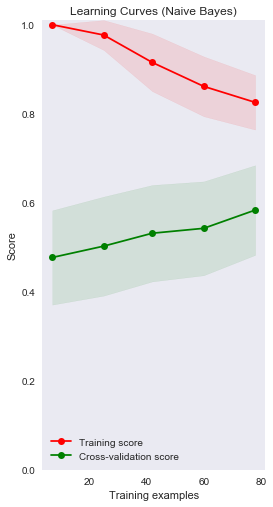

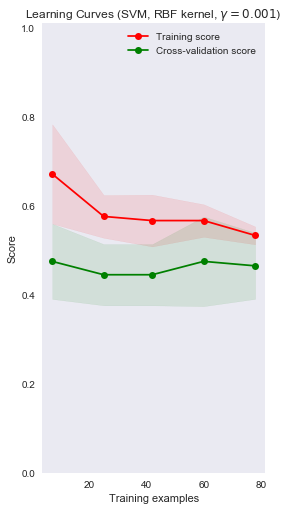

In [341]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



# load dataset
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
X = df.iloc[:,3:]
#Y = df.loc[:,'CLIN']
y = pd.factorize(df['CLIN'])[0]  # represent cohorts by binary numbers
# Shuffeled y_test

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0, 1.01), cv=cv, n_jobs=4)

plt.show()

### 4.7.2 LC - For selected features

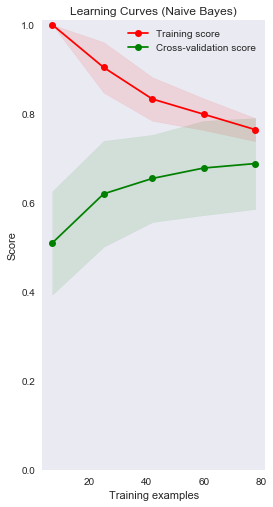

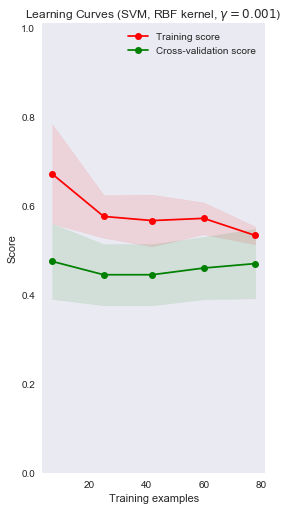

In [340]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



# load dataset
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
X = df.loc[:,Best_Features_by_KS_and_RF]
#Y = df.loc[:,'CLIN']
y = pd.factorize(df['CLIN'])[0]  # represent cohorts by binary numbers
# Shuffeled y_test

title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, ylim=(0, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y, (0, 1.01), cv=cv, n_jobs=4)

plt.show()

## Step 5:  Control
As a control:<br/>
1) we randomly shuffled the clinical groups of y_test set after trained our model on original data.<br/> 
2) we randomly shuffled the clinical groups and trained our models. <br/>
we expect the predications' scores to decline.

### 5.1 Control -  Without selecting features:

In [314]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}

# load dataset
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
X = df.iloc[:,3:]
#X = df.loc[:,Best_Features_by_KS_and_RF]
#Y = df.loc[:,'CLIN']
Y = pd.factorize(df['CLIN'])[0]  # represent cohorts by binary numbers

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model = RandomForestClassifier(criterion= 'gini',min_samples_split= 8, max_depth= 4, max_features= 'log2', n_estimators=200)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print ('Precision:', metrics.precision_score(y_test, y_pred,average='binary'))
# Shuffeled y_test
from sklearn.utils import shuffle
y_test_shuffle = shuffle(y_test)
print ('Precision after shuffle y_test:', metrics.precision_score(y_test_shuffle, y_pred,average='binary'))

print('y_test',y_test)
print('y_test_suffled',y_test_shuffle)
print('y_pred: ',y_pred)

print('\n For original model :',classification_report(y_test,y_pred))
print('\n For model with y_test shuffle : ',classification_report(y_test_shuffle,y_pred))


Precision: 0.5454545454545454
Precision after shuffle y_test: 0.5454545454545454
y_test [1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0]
y_test_suffled [0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1]
y_pred:  [0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1]

 For original model :              precision    recall  f1-score   support

          0       0.56      0.50      0.53        10
          1       0.55      0.60      0.57        10

avg / total       0.55      0.55      0.55        20


 For model with y_test shuffle :               precision    recall  f1-score   support

          0       0.56      0.50      0.53        10
          1       0.55      0.60      0.57        10

avg / total       0.55      0.55      0.55        20



### 5.2 Control - For informative columns:

In [303]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}

# load dataset
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
#X = df.iloc[:,3:]
X = df.loc[:,Best_Features_by_KS_and_RF]
#Y = df.loc[:,'CLIN']
Y = pd.factorize(df['CLIN'])[0]  # represent cohorts by binary numbers

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


model = RandomForestClassifier(criterion= 'gini',min_samples_split= 8, max_depth= 4, max_features= 'log2', n_estimators=200)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print ('Precision:', metrics.precision_score(y_test, y_pred,average='binary'))
# Shuffeled y_test
from sklearn.utils import shuffle
y_test_shuffle = shuffle(y_test)
print ('Precision after shuffle y_test:', metrics.precision_score(y_test_shuffle, y_pred,average='binary'))

print('y_test',y_test)
print('y_test_suffled',y_test_shuffle)
print('y_pred: ',y_pred)

print('\n For original model :',classification_report(y_test,y_pred))
print('\n For model with y_test shuffle : ',classification_report(y_test_shuffle,y_pred))


Precision: 0.7
Precision after shuffle y_test: 0.5
y_test [1 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0]
y_test_suffled [1 1 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0]
y_pred:  [1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1]

 For original model :              precision    recall  f1-score   support

          0       0.70      0.70      0.70        10
          1       0.70      0.70      0.70        10

avg / total       0.70      0.70      0.70        20


 For model with y_test shuffle :               precision    recall  f1-score   support

          0       0.50      0.50      0.50        10
          1       0.50      0.50      0.50        10

avg / total       0.50      0.50      0.50        20



### 5.3 Control - compare algorithms scores

accuracy results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.441111 (0.112332)
RF: 0.610000 (0.190933)
NB: 0.592222 (0.107617)
SVM: 0.540000 (0.054930)
KNN: 0.560000 (0.144973)
DT: 0.477778 (0.120800)


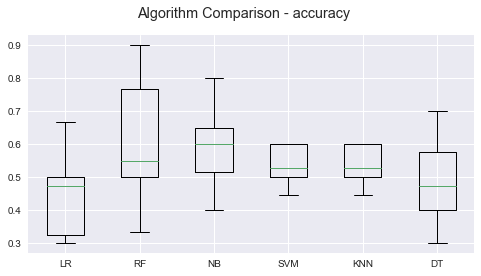

f1_macro results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.301905 (0.053898)
RF: 0.531499 (0.176461)
NB: 0.547415 (0.128688)
SVM: 0.528432 (0.064038)
KNN: 0.551836 (0.147555)
DT: 0.427383 (0.165726)


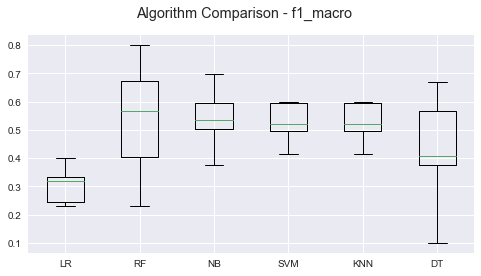

recall results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.800000 (0.400000)
RF: 0.634286 (0.277467)
NB: 0.352381 (0.203186)
SVM: 0.541667 (0.110960)
KNN: 0.566429 (0.209617)
DT: 0.450952 (0.267194)


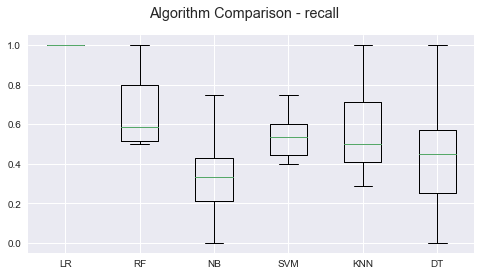

precision results after 10-fold CV:
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
LR: 0.381111 (0.209647)
RF: 0.547143 (0.284365)
NB: 0.691667 (0.335514)
SVM: 0.586667 (0.166800)
KNN: 0.591667 (0.116726)
DT: 0.447619 (0.297581)


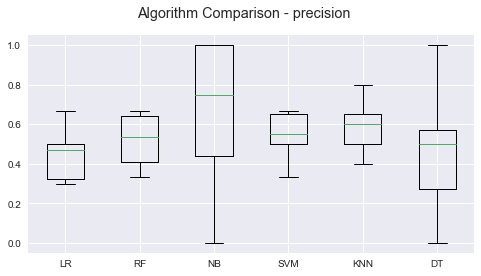

In [269]:
# Compare Algorithms - for all the features
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import random

# when we have no healthy or celiac target in the test set we get an warning for f1 & recall scores
# In order not to see warnings we used:
import warnings
warnings.filterwarnings("ignore")

# load dataset
df = pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
X = df.iloc[:,3:]
#Y = df.loc[:,'CLIN']
Y = pd.factorize(df['CLIN'])[0]  # represent cohorts by binary numbers
# Shuffeled y_test
from sklearn.utils import shuffle
Y = suffle(Y)



# prepare configuration for cross validation test harness
# Enter seed before all model defenition!! 
seed = 7
# try diffrent cross-validation(cv) technique
cv_shuffel = model_selection.ShuffleSplit(n_splits=10, test_size=0.3, random_state=seed)
kfold = model_selection.KFold(n_splits=10, random_state=seed)


# Enter seed before all model defenition!! 
random.seed(1234)
# prepare models
models = []
models.append(('LR', LogisticRegression(C=0.28273756267323114, class_weight=None, dual=False,
                      fit_intercept=True, intercept_scaling=1, max_iter=100,
                      multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
                      solver='liblinear', tol=0.0001, verbose=0, warm_start=False)))
models.append(('RF', RandomForestClassifier(criterion= 'gini',min_samples_split= 8, max_depth= 4, max_features= 'log2', n_estimators=200)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
                      decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
                      max_iter=-1, probability=False, random_state=42, shrinking=True,
                      tol=0.001, verbose=False)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))

# loop for calculate different scores
scoring_name_list= ["accuracy", "f1_macro", "recall","precision"]
for score_name in scoring_name_list:
    # evaluate each model in turn
    results = []
    names = []
    Scoring = score_name
    print(Scoring, 'results after 10-fold CV:')
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    for name, model in models:
        cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=Scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    # boxplot algorithm comparison
    fig = plt.figure(figsize=(8,4))
    title = 'Algorithm Comparison' + ' - ' +score_name
    fig.suptitle(title)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()



**5.4 Control Results:** <br/>
    For data with all the features, we don't get a drop in scores. <br/>
    For data with informative columns, we get a decline of ~20% for suffle scores.

-----------------------------------------------------------------------

# Step 6: New machine learning function - 
### based on KStest, Logistic Regresion and Kfold cross validation
As a result of the above results, the informative features give better scores, so we decided to build a classifying model based on the integration of the 3  steps that improved our model:
* 10-Fold Cross Validation
* Extract informative features by KS test (Pvalue<0.05)
* Used the model with the best performance
* Tuned hyperparameters for each subset fold

We extract features in each diffrent fold, in order to avoid the chance that the features we extracted at the beginning of the project are biased.

### 6.1 Let's start with SVM model:

In [254]:
# import packages
from scipy import stats #for KS test
import collections # for find duplicate variables
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

# load data 
df= pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL') #load data
X = df.iloc[:,3:]
y = df.loc[:,'CLIN']

# initialization
seed= 40
informative_columns = []
KS_fold_number = 10
subset_data_percent = 0.85
test_size_fold = 1-subset_data_percent
informative_columns_all = []

# loop for merge informative_features from all 10 different subset data.
# informative_features choose if for KS test between celiac&healty distribution 
# the p_value is less then 0.05.
# in order to get different subset in each iteration we used different seeds
for i in range(1,KS_fold_number):
    # split to 80% data [change seed in each iteration]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size_fold, random_state=seed+i)
    xy_train_subset = x_train
    xy_train_subset.insert(loc=0,column='CLIN',value= list(y_train))
    #separate data to healthy and celiac data
    data_features = xy_train_subset
    dist_healthy = data_features.loc[data_features['CLIN']== 'Healthy']
    dist_celiac = data_features.loc[data_features['CLIN']== 'Celiac']
    # loop for calculate KS test(for each feature name) between Celiac to healthy feature's distribution.
    # and save feature names with pvalue < 0.05
    col_num = len(xy_train_subset.columns.values)
    informative_columns = []
    for idx_col in range(1,col_num):
        dist_healthy_feature = dist_healthy.iloc[:,idx_col]
        dist_celiac_feature = dist_celiac.iloc[:,idx_col]
        score = stats.ks_2samp(dist_healthy_feature, dist_celiac_feature)
        if score.pvalue < 0.05 :
            # save columns names of informative features for this xy_train iteration
            informative_columns.append(xy_train_subset.columns[idx_col])
            # if you want to print each iteration results:
              #print(xy_train_subset.columns[idx_col])
             ##print(stats.ks_2samp(dist_healthy_feature, dist_celiac_feature) )

    # train SVC model with x_train y_train 
    x_train_KS = x_train.loc[:,informative_columns]
    # save informative columns from all the iteration together
    informative_columns_all.append(informative_columns)
    # estimator
    svc = SVC()
    # Searching for the right parameters
    param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 
    svc_model = GridSearchCV(estimator=svc, param_grid=param_grid, cv= 10)
    svc_model.fit(x_train_KS ,y_train)
    # Model Evaluation
    #**Now get predictions from the model and create a confusion matrix **
    x_test_KS = x_test.loc[:,informative_columns]
    predictions = svc_model.predict(x_test_KS)
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    print('Confusion Matrix')
    print(confusion_matrix(y_test,predictions))
    print('Classification report')
    print(classification_report(y_test,predictions))
    print("tuned hpyerparameters :(best parameters) ",svc_model.best_params_)
    print("accuracy of best hyperparameters :",svc_model.best_score_)
    scores = cross_val_score(svc_model, X.loc[:,informative_columns], y, cv=10)
    #print("Cross_val_score",scores)
    print("cross_val Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    
            
# Choose the duplicate features
import collections
# merged list-2D to list-1D
a = list(itertools.chain.from_iterable(informative_columns_all)) 
# save list with count numbers of duplicate features
informative_duplicate_count = pd.Series(a).value_counts() 
vc = informative_duplicate_count
# save list of duplicate features's names in decending order
informative_features_after_KS_folds = vc[vc > 2].index.tolist()
# print final result:

print('\n duplicate informative_features whithin all the folds:')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(informative_features_after_KS_folds)
print('\n informative_duplicate_count:')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(informative_duplicate_count)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Confusion Matrix
[[2 4]
 [4 5]]
Classification report
             precision    recall  f1-score   support

     Celiac       0.33      0.33      0.33         6
    Healthy       0.56      0.56      0.56         9

avg / total       0.47      0.47      0.47        15

tuned hpyerparameters :(best parameters)  {'C': 100, 'gamma': 1}
accuracy of best hyperparameters : 0.5903614457831325
cross_val Accuracy: 0.58 (+/- 0.26)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Confusion Matrix
[[3 5]
 [1 6]]
Classification report
             precision    recall  f1-score   support

     Celiac       0.75      0.38      0.50         8
    Healthy       0.55      0.86      0.67         7

avg / total       0.65      0.60      0.58        15

tuned hpyerparameters :(best parameters)  {'C': 100, 'gamma': 1}
accuracy of best hyperparameters : 0.6626506024096386
cross_val Accuracy: 0.59 (+/- 0.25)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Confusion Matr

### 6.2 With Gaussian Naive Bayes model, we again get better results:

f1-mean-score(NB) : 53.78 , f1-mean-score(SVM) : 48.22

In [263]:
# import packages
from scipy import stats #for KS test
import collections # for find duplicate variables
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

# load data 
df= pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL') #load data
X = df.iloc[:,3:]
y = df.loc[:,'CLIN']

# initialization
seed= 45
informative_columns = []
KS_fold_number = 10
subset_data_percent = 0.80
test_size_fold = 1-subset_data_percent
informative_columns_all = []

# loop for merge informative_features from all 10 different subset data.
# informative_features choose if for KS test between celiac&healty distribution 
# the p_value is less then 0.05.
# in order to get different subset in each iteration we used different seeds
for i in range(1,KS_fold_number):
    # split to 80% data [change seed in each iteration]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_size_fold, random_state=seed+i)
    xy_train_subset = x_train
    xy_train_subset.insert(loc=0,column='CLIN',value= list(y_train))
    #separate data to healthy and celiac data
    data_features = xy_train_subset
    dist_healthy = data_features.loc[data_features['CLIN']== 'Healthy']
    dist_celiac = data_features.loc[data_features['CLIN']== 'Celiac']
    # loop for calculate KS test(for each feature name) between Celiac to healthy feature's distribution.
    # and save feature names with pvalue < 0.05
    col_num = len(xy_train_subset.columns.values)
    informative_columns = []
    print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
    for idx_col in range(1,col_num):
        dist_healthy_feature = dist_healthy.iloc[:,idx_col]
        dist_celiac_feature = dist_celiac.iloc[:,idx_col]
        score = stats.ks_2samp(dist_healthy_feature, dist_celiac_feature)
        if score.pvalue < 0.05 :
            # save columns names of informative features for this xy_train iteration
            informative_columns.append(xy_train_subset.columns[idx_col])
            # if you want to print each iteration results:
             ##print(xy_train_subset.columns[idx_col])
             ##print(stats.ks_2samp(dist_healthy_feature, dist_celiac_feature) )

    print(informative_columns)
    # train the model with x_train y_train 
    x_train_KS = x_train.loc[:,informative_columns]
    # save informative columns from all the iteration together
    informative_columns_all.append(informative_columns)
    # estimator
    GN_model= GaussianNB()  
    #LR_model = LogisticRegression(C=1000,penalty="l2")
    GN_model.fit(x_train_KS ,y_train)
    # Model Evaluation
    #**Now get predictions from the model and create a confusion matrix **
    x_test_KS = x_test.loc[:,informative_columns]
    predictions = GN_model.predict(x_test_KS)
    print('Confusion Matrix')
    print(confusion_matrix(y_test,predictions))
    print('Classification report')
    print(classification_report(y_test,predictions))


            
# Choose the duplicate features
import collections
# merged list-2D to list-1D
a = list(itertools.chain.from_iterable(informative_columns_all)) 
# save list with count numbers of duplicate features
informative_duplicate_count = pd.Series(a).value_counts() 
vc = informative_duplicate_count
# save list of duplicate features's names in decending order
informative_features_after_KS_folds = vc[vc > 2].index.tolist()
# print final result:

print('\n duplicate informative_features whithin all the folds:')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(informative_features_after_KS_folds)
print('\n informative_duplicate_count:')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(informative_duplicate_count)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['J1', 'J2', 'D3-10', 'D3-9', 'V3_J1_x', 'V3_J2_x', 'V3_J3_x', 'V6_J3_x', 'V6_J6_x', 'D3-10*01', 'D3-9*01', 'J1*01', 'J2*01', 'V1-45_J4*02', 'V2-5_J3*02', 'V3-11_J3*02', 'V3-13_J2*01', 'V3-64_J1*01', 'V4-59_J1*01', 'V4-61_J3*02', 'V6-1_J3*02', '6.0-DseqL']
Confusion Matrix
[[7 6]
 [4 3]]
Classification report
             precision    recall  f1-score   support

     Celiac       0.64      0.54      0.58        13
    Healthy       0.33      0.43      0.38         7

avg / total       0.53      0.50      0.51        20

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['J1', 'V1-3', 'V3-43', 'V3_J1_x', 'V3_J2_x', 'V3_J6_x', 'V5_J1_x', 'V6_J6_x', 'V1-3*01', 'V1-46*03', 'V3-48*01', 'V3-49*03', 'J1*01', 'IGM', 'V1-3_J5*02', 'V3-48_J3*02', 'V4-59_J1*01', 'V6-1_J3*02']
Confusion Matrix
[[9 3]
 [3 5]]
Classification report
             precision    recall  f1-score   support

     Celiac       0.75      0.75      0.75        12
    Healthy       0.62      0.6

### 6.3 with random forest- 100 iteration - we get better scores.
f1-mean-score(SVM) : 48.22% , f1-mean-score(NB) : 53.78% , f1-mean-score(RF) : 68.27%

In [481]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

# load data
df= pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')

# splitting to features_data and target
data_x = df.iloc[:,3:]
feature_names = data_x.columns
data_y = pd.factorize(df['CLIN'])[0]

F1_sum = 0
seed = 42
seed_vector = [2,0,-5,9,6,1,3,5,-20]
for i in seed_vector :
        df= pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')

        train_features, test_features, train_labels, test_labels = train_test_split(  
                                            df.iloc[:,3:], pd.factorize(df['CLIN'])[0],test_size=0.3, random_state=seed + i )
        # select important features
        feature_selector = RandomForestClassifier(n_estimators=100)

        features = feature_selector.fit(train_features, train_labels)

        # sort the feature index by importance score in descending order
        importances_index_desc = np.argsort(feature_selector.feature_importances_)[::-1]
        feature_labels = [feature_names[i] for i in importances_index_desc]
        importances1 = pd.DataFrame({'FEATURE':data_x.columns,'IMPORTANCE':np.round(rfc.feature_importances_,3)})
        importances = importances1.sort_values('IMPORTANCE',ascending=False).set_index('FEATURE')
        # columns' names of importnt features (take the first 30)
        filtered_features = list(importances.index)[0:30]
        # Now to see the classification performance of the random forest using important features
        #clf = RandomForestClassifier(n_estimators=100, random_state=23, max_depth=3)  
        clf =  RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'log2', n_estimators=200)
        clf.fit(train_features.loc[:,filtered_features], train_labels)
        
        print('~~~~~~~~~~~~~~~~~~~~seed: ',seed+i,'~~~~~~~~~~~~~~~~~~~~~~~~~~')

        print(' \n \n ~~~~For Train Set~~~~')
        train_pred = clf.predict(train_features.loc[:,filtered_features])  
        print('Roc_auc on training set: {}'.format(roc_auc_score(train_labels, train_pred)))
        print('Confusion matrix on training set: \n ',(confusion_matrix(train_labels, train_pred)))
        print('F1 on training set: {}'.format(f1_score(train_labels, train_pred)))
        print('precision on training set: {}'.format(precision_score(train_labels, train_pred)))
        print('Accuracy on training set: {}'.format(accuracy_score(train_labels, train_pred))) 

        print(' \n \n ~~~~For Test Set~~~~')

        test_pred = clf.predict(test_features.loc[:,filtered_features])  
        print('Roc_auc on test set: {}'.format(roc_auc_score(test_labels, test_pred ))) 
        print('Confision matrix on training set: \n', (confusion_matrix(test_labels, test_pred)))
        print('F1 on training set: {}'.format(f1_score(test_labels, test_pred)))
        print('precision on training set: {}'.format(precision_score(test_labels, test_pred)))
        print('Accuracy on training set: {}'.format(accuracy_score(test_labels, test_pred)))
        print('\n~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

        F1_sum = F1_sum + f1_score(test_labels, test_pred)

F1_mean = F1_sum/ len(seed_vector)
print('F1 mean over ',len(seed_vector),' folds :' ,F1_mean)

~~~~~~~~~~~~~~~~~~~~seed:  44 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[32  0]
 [ 0 36]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.5666666666666667
Confision matrix on training set: 
 [[8 7]
 [6 9]]
F1 on training set: 0.5806451612903225
precision on training set: 0.5625
Accuracy on training set: 0.5666666666666667

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
~~~~~~~~~~~~~~~~~~~~seed:  42 ~~~~~~~~~~~~~~~~~~~~~~~~~~
 
 
 ~~~~For Train Set~~~~
Roc_auc on training set: 1.0
Confusion matrix on training set: 
  [[33  0]
 [ 0 35]]
F1 on training set: 1.0
precision on training set: 1.0
Accuracy on training set: 1.0
 
 
 ~~~~For Test Set~~~~
Roc_auc on test set: 0.7366071428571429
Confision matrix on training set: 
 [[11  3]
 [ 5 11]]
F1 on training set: 0.7333333333333334
precision on training set: 0.7

### 6.4 The best model for our data:
According the performances we received above, we choose in random forest model with the following hyper-parameters: <br/>
RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'log2', n_estimators=200)

###  6.5 Control for selected model:
Let's check our model(RF) performance scores by shuffle test set over 100 folds


In [484]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score

scoring = {'accuracy': make_scorer(accuracy_score),'prec': 'precision'}

# load dataset
df= pd.read_pickle('VDJ_CDR3_FUNC_ISOTYPE_DseqL')
X = df.loc[:,rf_important_features_list[0:30]]
#X = df.loc[:,Best_Features_by_KS_and_RF]
#Y = df.loc[:,'CLIN']
Y = pd.factorize(df['CLIN'])[0]  # represent cohorts by binary numbers

auc_shuffle_score =0
auc_mormal_score = 0
f1_normal_score=0
f1_shuffle_score =0
seed = 42
seed_vector = range(-20,100)
#seed_vector = [2,0,-5,9,6,1,3,5,-20]
for i in seed_vector :
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=seed + i)


    #model = RandomForestClassifier(criterion= 'gini',min_samples_split= 8, max_depth= 4, max_features= 'log2', n_estimators=200)
    model =  RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'log2', n_estimators=200)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)

    print('\n ~~~~~~~~seed=',seed,'~~~~~~~~~~~')

    print ('Precision:', metrics.precision_score(y_test, y_pred,average='binary'))
    # Shuffeled y_test
    from sklearn.utils import shuffle
    y_test_shuffle = shuffle(y_test)
    print ('Precision after shuffle y_test:', metrics.precision_score(y_test_shuffle, y_pred,average='binary'))
    
    f1_normal_score = f1_normal_score + metrics.f1_score(y_test, y_pred,average='binary')
    auc_mormal_score = auc_mormal_score + metrics.roc_auc_score(y_test,y_pred)
    
    print('y_test',y_test)
    print('y_test_suffled',y_test_shuffle)
    print('y_pred: ',y_pred)

    print('\n For original model :',classification_report(y_test,y_pred))
    print('\n For model with y_test shuffle : ',classification_report(y_test_shuffle,y_pred))
    
    f1_shuffle_score = f1_shuffle_score + metrics.f1_score(y_test_shuffle,y_pred)
    auc_shuffle_score = auc_shuffle_score + metrics.roc_auc_score(y_test_shuffle,y_pred)
    
    
f1_normal_mean = f1_normal_score/len(seed_vector)
f1_shuffle_mean = f1_shuffle_score/len(seed_vector)
auc_shuffle_mean = auc_shuffle_score/len(seed_vector)
auc_normal_mean = auc_mormal_score/len(seed_vector)

print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('\n f1_normal_mean : ',f1_normal_mean )
print('f1_shuffle_mean: ',f1_shuffle_mean)
print('\n auc_normal_mean: ',auc_normal_mean)
print('auc_shuffle_mean: ',auc_shuffle_mean)



 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.6
Precision after shuffle y_test: 0.8
y_test [0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0]
y_test_suffled [0 1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0]
y_pred:  [0 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 1 0]

 For original model :              precision    recall  f1-score   support

          0       0.60      0.60      0.60        10
          1       0.60      0.60      0.60        10

avg / total       0.60      0.60      0.60        20


 For model with y_test shuffle :               precision    recall  f1-score   support

          0       0.80      0.80      0.80        10
          1       0.80      0.80      0.80        10

avg / total       0.80      0.80      0.80        20


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.4
Precision after shuffle y_test: 0.4
y_test [1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0]
y_test_suffled [1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 0 1]
y_pred:  [1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1]

 For original model :            


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.5
Precision after shuffle y_test: 0.4166666666666667
y_test [0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1]
y_test_suffled [0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0]
y_pred:  [1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0]

 For original model :              precision    recall  f1-score   support

          0       0.88      0.54      0.67        13
          1       0.50      0.86      0.63         7

avg / total       0.74      0.65      0.65        20


 For model with y_test shuffle :               precision    recall  f1-score   support

          0       0.75      0.46      0.57        13
          1       0.42      0.71      0.53         7

avg / total       0.63      0.55      0.56        20


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.625
Precision after shuffle y_test: 0.5
y_test [0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1]
y_test_suffled [0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0]
y_pred:  [0 1 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 1 0]

 For original mo


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.5833333333333334
Precision after shuffle y_test: 0.6666666666666666
y_test [0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1 1]
y_test_suffled [0 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 0 1 0 1]
y_pred:  [1 0 1 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 1 1]

 For original model :              precision    recall  f1-score   support

          0       0.38      0.38      0.38         8
          1       0.58      0.58      0.58        12

avg / total       0.50      0.50      0.50        20


 For model with y_test shuffle :               precision    recall  f1-score   support

          0       0.50      0.50      0.50         8
          1       0.67      0.67      0.67        12

avg / total       0.60      0.60      0.60        20


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.5
Precision after shuffle y_test: 0.125
y_test [0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0]
y_test_suffled [1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0]
y_pred:  [0 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1]

 


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.6363636363636364
Precision after shuffle y_test: 0.5454545454545454
y_test [0 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0]
y_test_suffled [1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 0 0 0]
y_pred:  [1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0]

 For original model :              precision    recall  f1-score   support

          0       0.78      0.64      0.70        11
          1       0.64      0.78      0.70         9

avg / total       0.71      0.70      0.70        20


 For model with y_test shuffle :               precision    recall  f1-score   support

          0       0.67      0.55      0.60        11
          1       0.55      0.67      0.60         9

avg / total       0.61      0.60      0.60        20


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.6153846153846154
Precision after shuffle y_test: 0.46153846153846156
y_test [1 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1]
y_test_suffled [1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0]
y_pred:  [1 1 0 1 1 1 0 


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.8181818181818182
Precision after shuffle y_test: 0.5454545454545454
y_test [1 1 1 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 0]
y_test_suffled [1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 0 1 0]
y_pred:  [1 0 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 0]

 For original model :              precision    recall  f1-score   support

          0       0.78      0.78      0.78         9
          1       0.82      0.82      0.82        11

avg / total       0.80      0.80      0.80        20


 For model with y_test shuffle :               precision    recall  f1-score   support

          0       0.44      0.44      0.44         9
          1       0.55      0.55      0.55        11

avg / total       0.50      0.50      0.50        20


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.7272727272727273
Precision after shuffle y_test: 0.45454545454545453
y_test [1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1]
y_test_suffled [0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1]
y_pred:  [1 0 0 0 1 1 0 


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.8
Precision after shuffle y_test: 0.6
y_test [1 1 1 1 1 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0]
y_test_suffled [0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1]
y_pred:  [1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0]

 For original model :              precision    recall  f1-score   support

          0       0.60      0.75      0.67         8
          1       0.80      0.67      0.73        12

avg / total       0.72      0.70      0.70        20


 For model with y_test shuffle :               precision    recall  f1-score   support

          0       0.40      0.50      0.44         8
          1       0.60      0.50      0.55        12

avg / total       0.52      0.50      0.51        20


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.8181818181818182
Precision after shuffle y_test: 0.6363636363636364
y_test [1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 0 0 0 1 1]
y_test_suffled [0 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 0]
y_pred:  [1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0]

 Fo


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.8
Precision after shuffle y_test: 0.6
y_test [1 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 1]
y_test_suffled [1 1 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 0]
y_pred:  [1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1]

 For original model :              precision    recall  f1-score   support

          0       0.70      0.78      0.74         9
          1       0.80      0.73      0.76        11

avg / total       0.76      0.75      0.75        20


 For model with y_test shuffle :               precision    recall  f1-score   support

          0       0.50      0.56      0.53         9
          1       0.60      0.55      0.57        11

avg / total       0.55      0.55      0.55        20


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.8571428571428571
Precision after shuffle y_test: 0.8571428571428571
y_test [0 0 0 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 1 1]
y_test_suffled [1 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0]
y_pred:  [0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0]

 Fo


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.46153846153846156
Precision after shuffle y_test: 0.3076923076923077
y_test [0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0]
y_test_suffled [1 1 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0]
y_pred:  [0 0 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1]

 For original model :              precision    recall  f1-score   support

          0       0.57      0.36      0.44        11
          1       0.46      0.67      0.55         9

avg / total       0.52      0.50      0.49        20


 For model with y_test shuffle :               precision    recall  f1-score   support

          0       0.29      0.18      0.22        11
          1       0.31      0.44      0.36         9

avg / total       0.30      0.30      0.29        20


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.7272727272727273
Precision after shuffle y_test: 0.7272727272727273
y_test [1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0]
y_test_suffled [1 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 1 1 0]
y_pred:  [1 0 1 1 0 0 1 


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.7777777777777778
Precision after shuffle y_test: 0.5555555555555556
y_test [1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1]
y_test_suffled [1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1]
y_pred:  [0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1]

 For original model :              precision    recall  f1-score   support

          0       0.55      0.75      0.63         8
          1       0.78      0.58      0.67        12

avg / total       0.68      0.65      0.65        20


 For model with y_test shuffle :               precision    recall  f1-score   support

          0       0.36      0.50      0.42         8
          1       0.56      0.42      0.48        12

avg / total       0.48      0.45      0.45        20


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.625
Precision after shuffle y_test: 0.5
y_test [1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 1]
y_test_suffled [0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1]
y_pred:  [0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1]

 


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.8
Precision after shuffle y_test: 0.4
y_test [0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1]
y_test_suffled [0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1]
y_pred:  [0 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 1 0 0]

 For original model :              precision    recall  f1-score   support

          0       0.70      0.78      0.74         9
          1       0.80      0.73      0.76        11

avg / total       0.76      0.75      0.75        20


 For model with y_test shuffle :               precision    recall  f1-score   support

          0       0.30      0.33      0.32         9
          1       0.40      0.36      0.38        11

avg / total       0.35      0.35      0.35        20


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.6
Precision after shuffle y_test: 0.3
y_test [0 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1]
y_test_suffled [1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0]
y_pred:  [1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1]

 For original model :            


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.625
Precision after shuffle y_test: 0.375
y_test [0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0]
y_test_suffled [1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 0]
y_pred:  [0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0]

 For original model :              precision    recall  f1-score   support

          0       0.75      0.75      0.75        12
          1       0.62      0.62      0.62         8

avg / total       0.70      0.70      0.70        20


 For model with y_test shuffle :               precision    recall  f1-score   support

          0       0.58      0.58      0.58        12
          1       0.38      0.38      0.38         8

avg / total       0.50      0.50      0.50        20


 ~~~~~~~~seed= 42 ~~~~~~~~~~~
Precision: 0.5
Precision after shuffle y_test: 0.3333333333333333
y_test [0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0]
y_test_suffled [0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0]
y_pred:  [0 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1]

 For original 

### 6.6 **Final Prediction Results:** 
f1-mean-score(RF) = 0.698 ,<br/>
f1-mean-score(RF control with shuffle y_test) = 0.517 <br/><br/>
auc-mean-score(RF):  0.70 <br/>
auc-shuffle-score(RF control with shuffle y_test):  0.523
    

-----------------------------------------------------------------------

# Step 7: Conclusion and Results

We utilized a machine learning approach, in order to predicts the clinical group based on a combination of the given features. This approach can be utilized not only as a prediction model, but it may also be used as a tool to identify significant features that did not rise in the single-feature analysis.

For feature selection and prediction model for B cell repertoires, we calculated frequency per-sample for each repertoire of sequences.To avoid false repetroires which may occur due to grouping of several erroneous sequences with correct ones, we removed sequences with rare features expression that appeared in at low frequencies and/or in less than others. In order to be sure that we worked with **Naive** B cells we filtered all sequences with no appropriate isotype, means that all the sequences we work with are from IGM/IGD isotype(These isotypes characterize the naive cells). 

We applied Random Forests model to extract the best 20 features, followed by utilization of different models on the selected features to generate the prediction model. The process of sampling and training was repeated K times, to ensure that the model was not biased towards specific samples.


The final predications results summarized in step 6.6 , demonstrate 69.8% f1-score for prediction of Healthy vs. Celiac, by using the Random Forest algorithm with the following hyper-parameters: <br/>
RandomForestClassifier(criterion= 'gini', max_depth= 8, max_features= 'log2', n_estimators=200).
Moreover As a control, when we randomly shuffled the clinical groups and trained our model, prediction rates were not have dramatic declined (Step 4.7 & 7.3), suggesting that we maybe achieve our good accuracy predictions due to over fitting or other random bias of any specific sample. However, in the control proccess for the model with selected features(step 6.5), we see decline of ~20% in f1 and auc scores.

From the steps of feature selection, we received interesting results that need to be examined in depth by follow-up work.

-------------------------------------------------
Overall, we found **no evidence** that circulating
Celiac repertoires were biased due to gene expression or
CDR3 properties of B cells from the naive compartments, however, we received good scores for classification by random forest model.

# The next steps

We are still hopeful to find a good model for clasification. Another way of defining features is to look at sequence similarity. This essentially means clustering the sequences according to similarity and taking the frequency of each cluster in each sample as a feature.
Thus, our next steps will be to focus on analysis of the repertoire by sequence level. For example : K-MER algorithm and network clustering.

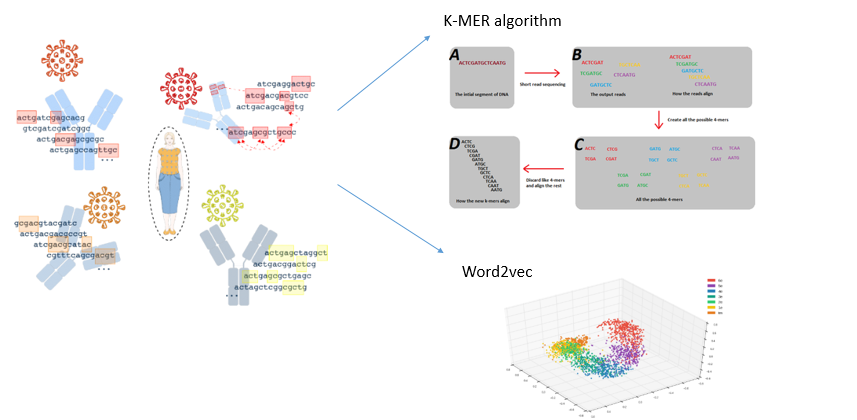

In [3]:
from IPython.display import Image
Image(filename='sequence_based_ML.png')

Of particular interest is the distribution of each feature in different datasets that come from healthy controls. Features that are generally stable across individuals and cohorts offer the potential to be good biomarkers.

Additionally,We will divide all of our data according to the demographic information we have (sex), and assess the various distributions for each such division independently. If we see dramatic differences in some of the features between sex groups, it will be interesting by itself.

[In this work, I started to look on difference between sex group but no dramatic changes were observed. ]